# Goal: Can we predict the climate given a certain concentration of greenhouse gases in the atmosphere?
___
Climate change is a natural phenomenon that refers to changes in temperature and other weather conditions. Although it is a natural process, humans have impacted or even may have accelerated climate change. As human civilization become more technological, so does the concentration of green house gases. One such gas is carbon dioxide, a byproduct from the production of energy from the burning of fossil fuels. We will be investigating how carbon dioxide and other greenhouse gases are altering the climate of various cities on Earth. With this information, the Environmental Protection Agency (EPA) can focus on which areas around the world are most influenced and benefit from limiting emissions.

# Import libraries
___

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import glob
import os

# Import dataframes
___
Load data by using `pd.read_csv`. We can create a function that will gain access to the data folders according to the directory.

In [2]:
def read_csv(directory):
    # Directory that holds the csv files
    path = directory
    # Get all files that end with '.csv'
    all_files = glob.glob(os.path.join(path, '*.csv'))

    l = []
    # For loop that iterates through each csv file and stores them in a list
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        l.append(df)
    # Concatenate the dataframes into one
    df = pd.concat(l, axis=0, ignore_index=True)
    
    return df

Import dataframes

In [3]:
# Climate data
climate_df = read_csv('Climate_data')
# Carbon dioxide emission
carbon_df = read_csv('CO2_data')
# Methane emission
methane_df = read_csv('CH4_data')
# Nitrous oxide emission
nitro_df = read_csv('N2O_data')
# Sulfur hexafluoride emission
sulfur_df = read_csv('SF6_data')

# Data preparation
___
Although both data is provided by NOAA, they are taken from two different sites. The first step we take is renaming the columns (NOAA uses acroynms for their climate data) and changing the date from a string to datetime.

### Climate data
___
To prepare the climate data, we first change the date into datetime.

In [4]:
# Changed date into datetime
climate_df['DATE'] = pd.to_datetime(climate_df['DATE'])

In [5]:
# Change the names of the columns
columns = {'DATE':'Date',
           'ADPT':'Average Dew Point Temperature', 
           'AWND':'Average Wind Speed',
           'PRCP':'Total Monthly Precipitation',
           'PSUN':'Monthly Average of the daily percents of possible sunshine',
           'TAVG':'Average Monthly Temperature',
           'TMAX':'Monthly Maximum Temperature',
           'TMIN':'Monthly Minimum Temperature',
           'RHAV':'Relative Humidity'}

climate_df = climate_df.rename(columns=columns)

The climate data contains climate from different cities. We can code a function to create a new dataframe depending on its city.

In [6]:
# Decrease the size of the dataframe to these specific columns
cols = ['Date',
        'Total Monthly Precipitation',
        'Average Monthly Temperature']

# Function that takes the name of the city, columns names, dataframe holding the data, and the column 'NAME'
def create_df(name, column_names, dataframe, site='NAME'):
    # Getting the rows that have the name of a specific city
    df = dataframe[dataframe[site] == name]
    # Getting dataframe of only the specified columns
    df = df[column_names]
    # Returns the dataframe with the date as its index
    return df.set_index('Date')

We can run the function to create dataframes of these cities:
- BOULDER, CO US
- HILO INTERNATIONAL AIRPORT 87, HI US
- HOHENPEISSENBERG, GM
- CAPE FLORIDA, FL US
- LOS ANGELES DOWNTOWN USC, CA US
- SAN FRANCISCO DOWNTOWN, CA US
- VESTMANNAEYJAR, IC
- TEMPLE DRAUGHTON MIL, TX US

In [7]:
bou = create_df('BOULDER, CO US', cols, climate_df)
hil = create_df('HILO INTERNATIONAL AIRPORT 87, HI US', cols, climate_df)
hoh = create_df('HOHENPEISSENBERG, GM', cols, climate_df)
cap = create_df('CAPE FLORIDA, FL US', cols, climate_df)
los = create_df('LOS ANGELES DOWNTOWN USC, CA US', cols, climate_df)
san = create_df('SAN FRANCISCO DOWNTOWN, CA US', cols, climate_df)
ice = create_df('VESTMANNAEYJAR, IC', cols, climate_df)
tem = create_df('TEMPLE DRAUGHTON MIL, TX US', cols, climate_df)

###  Creating a date column for the greenhouse gas dataframes
___

The date of the emission data is stored in separate columns (year, month, day, hour, etc). We will create a new column that merges the `year` and `month` and will be changed into datetime.

In [8]:
def create_df_with_date(dataframe, site):
    df = dataframe[dataframe['site_code'] == site].copy()
    df[['year', 'month']] = df[['year', 'month']].astype(str)
    df['Date'] = df[['year', 'month']].agg(''.join, axis=1)
    df['Date'] = df['Date'].astype(int)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')
    df = df[['Date', 'value']]
    return df.set_index('Date')

We can run the same function to create a dataframe of CO2 concentration of specific cities. However, the cities are written as three character strings under the `site_code` column.
- BAO - Boulder, CO
- MLO - Mauna Loa, HI
- HPB - Hohenpeissenberg, GM
- KEY - Key Biscayne, FL
- MWO - Los Angeles, CA
- STR - San Francisco, CA
- ICE - Vestmannaeyjar, IC
- WKT - Moody, TX

In [9]:
# Carbon dioxide
bou_co2 = create_df_with_date(carbon_df, 'BAO').rename(columns={'value': 'CO2 Concentration'})
hil_co2 = create_df_with_date(carbon_df, 'MLO').rename(columns={'value': 'CO2 Concentration'})
hoh_co2 = create_df_with_date(carbon_df, 'HPB').rename(columns={'value': 'CO2 Concentration'})
cap_co2 = create_df_with_date(carbon_df, 'KEY').rename(columns={'value': 'CO2 Concentration'})
los_co2 = create_df_with_date(carbon_df, 'MWO').rename(columns={'value': 'CO2 Concentration'})
san_co2 = create_df_with_date(carbon_df, 'STR').rename(columns={'value': 'CO2 Concentration'})
ice_co2 = create_df_with_date(carbon_df, 'ICE').rename(columns={'value': 'CO2 Concentration'})
tem_co2 = create_df_with_date(carbon_df, 'WKT').rename(columns={'value': 'CO2 Concentration'})

In [10]:
# Methane
bou_ch4 = create_df_with_date(methane_df, 'BAO').rename(columns={'value': 'CH4 Concentration'})
hil_ch4 = create_df_with_date(methane_df, 'MLO').rename(columns={'value': 'CH4 Concentration'})
hoh_ch4 = create_df_with_date(methane_df, 'HPB').rename(columns={'value': 'CH4 Concentration'})
cap_ch4 = create_df_with_date(methane_df, 'KEY').rename(columns={'value': 'CH4 Concentration'})
los_ch4 = create_df_with_date(methane_df, 'MWO').rename(columns={'value': 'CH4 Concentration'})
san_ch4 = create_df_with_date(methane_df, 'STR').rename(columns={'value': 'CH4 Concentration'})
ice_ch4 = create_df_with_date(methane_df, 'ICE').rename(columns={'value': 'CH4 Concentration'})
tem_ch4 = create_df_with_date(methane_df, 'WKT').rename(columns={'value': 'CH4 Concentration'})

In [11]:
# Nitrous Oxide
bou_n2o = create_df_with_date(nitro_df, 'BAO').rename(columns={'value': 'N2O Concentration'})
hil_n2o = create_df_with_date(nitro_df, 'MLO').rename(columns={'value': 'N2O Concentration'})
hoh_n2o = create_df_with_date(nitro_df, 'HPB').rename(columns={'value': 'N2O Concentration'})
cap_n2o = create_df_with_date(nitro_df, 'KEY').rename(columns={'value': 'N2O Concentration'})
los_n2o = create_df_with_date(nitro_df, 'MWO').rename(columns={'value': 'N2O Concentration'})
san_n2o = create_df_with_date(nitro_df, 'STR').rename(columns={'value': 'N2O Concentration'})
ice_n2o = create_df_with_date(nitro_df, 'ICE').rename(columns={'value': 'N2O Concentration'})
tem_n2o = create_df_with_date(nitro_df, 'WKT').rename(columns={'value': 'N2O Concentration'})

In [12]:
# Sulfur hexachloride
bou_sf6 = create_df_with_date(sulfur_df, 'BAO').rename(columns={'value': 'SF6 Concentration'})
hil_sf6 = create_df_with_date(sulfur_df, 'MLO').rename(columns={'value': 'SF6 Concentration'})
hoh_sf6 = create_df_with_date(sulfur_df, 'HPB').rename(columns={'value': 'SF6 Concentration'})
cap_sf6 = create_df_with_date(sulfur_df, 'KEY').rename(columns={'value': 'SF6 Concentration'})
los_sf6 = create_df_with_date(sulfur_df, 'MWO').rename(columns={'value': 'SF6 Concentration'})
san_sf6 = create_df_with_date(sulfur_df, 'STR').rename(columns={'value': 'SF6 Concentration'})
ice_sf6 = create_df_with_date(sulfur_df, 'ICE').rename(columns={'value': 'SF6 Concentration'})
tem_sf6 = create_df_with_date(sulfur_df, 'WKT').rename(columns={'value': 'SF6 Concentration'})

# Data analysis/visualization
___

To visualize the data, we can plot the data to see any abnormalities like outliers or missing values. A function will be coded where the y is the column name and the x is the date. The `bin_num` is set to 100 as default but can be changed.

In [13]:
def plot(y_value, df, x_value='Date', bin_num=100):    
    # Store median value to plot a vertical line on the histogram plot
    median = df[y_value].median()
    
    sns.set(rc={'figure.figsize':(10,10)})
    sns.set_style('white')
    # Scatter plot
    fig, axs = plt.subplots(2, 1, figsize=(15, 10), dpi=100)
    sns.scatterplot(data=df, x=x_value, y=y_value, ax=axs[0])
    # Histogram plot
    sns.histplot(data=df[y_value], kde=True, bins=bin_num, ax=axs[1])
    axs[1].axvline(median, color='r')
    plt.tight_layout()

### Climate data visualization
___

Because we want to visualize each column of the climate data, we can create a for loop that will loop through all the columns and plot accordingly.

In [14]:
cols_ = ['Total Monthly Precipitation',
        'Average Monthly Temperature']

def plot_climate(df):
    # Iterate through each column and run the plot function
    for col in cols_:
        # Not all columns hold data so those will be omitted when visualizing the data
        if len(df[col]) != df[col].isna().sum():
            plot(col, df)

__Visualizing the climate data of Hilo International Airport, Hawaii:__

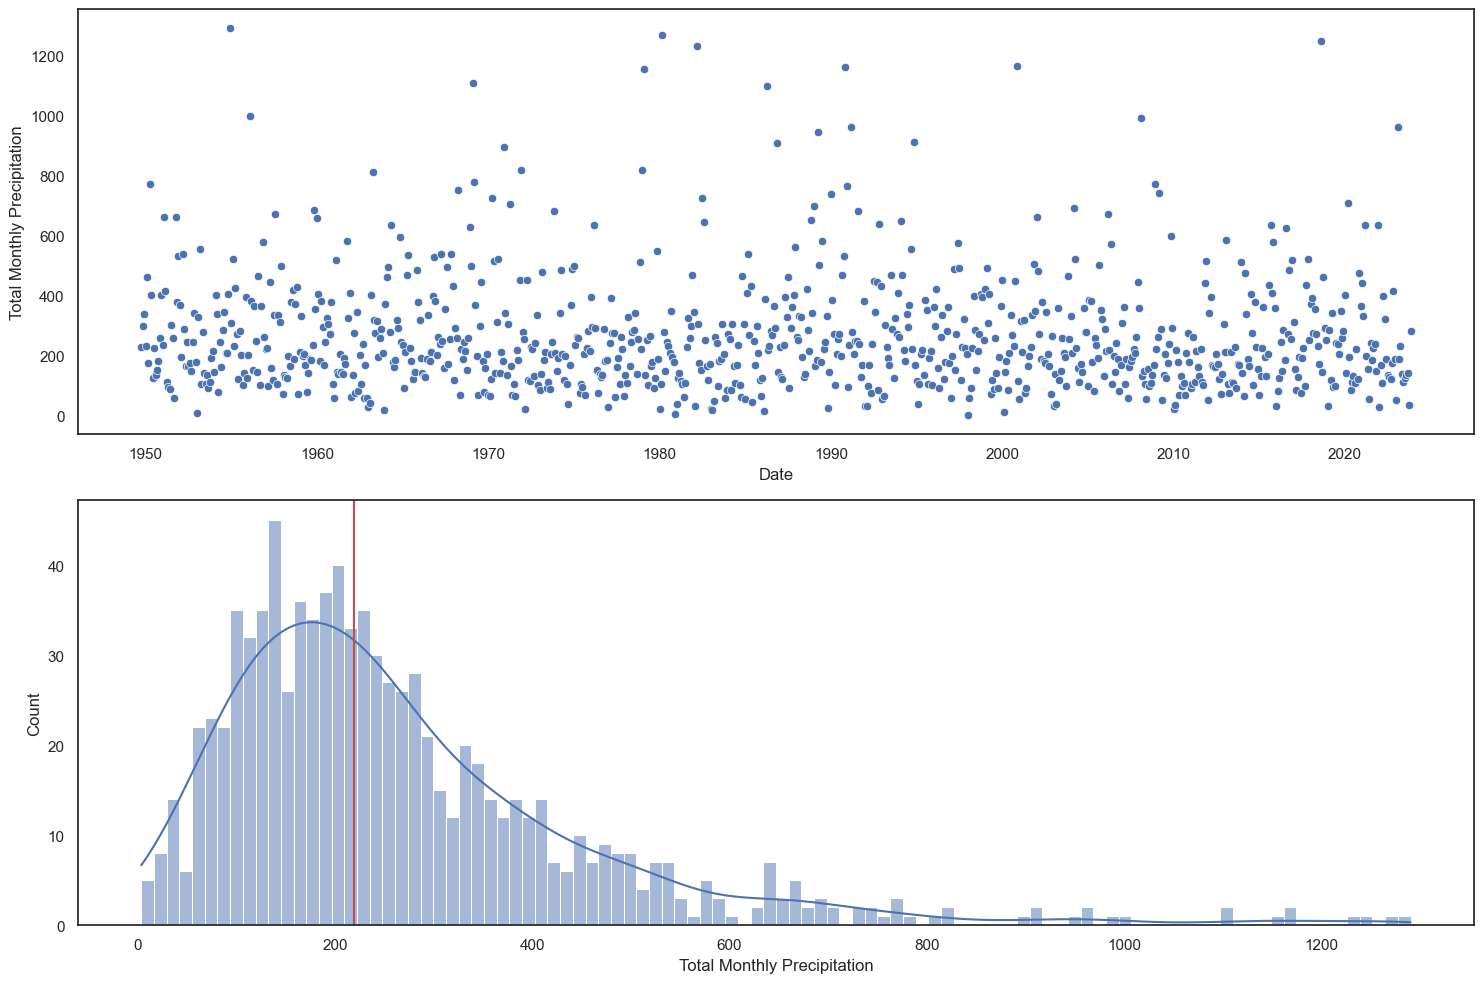

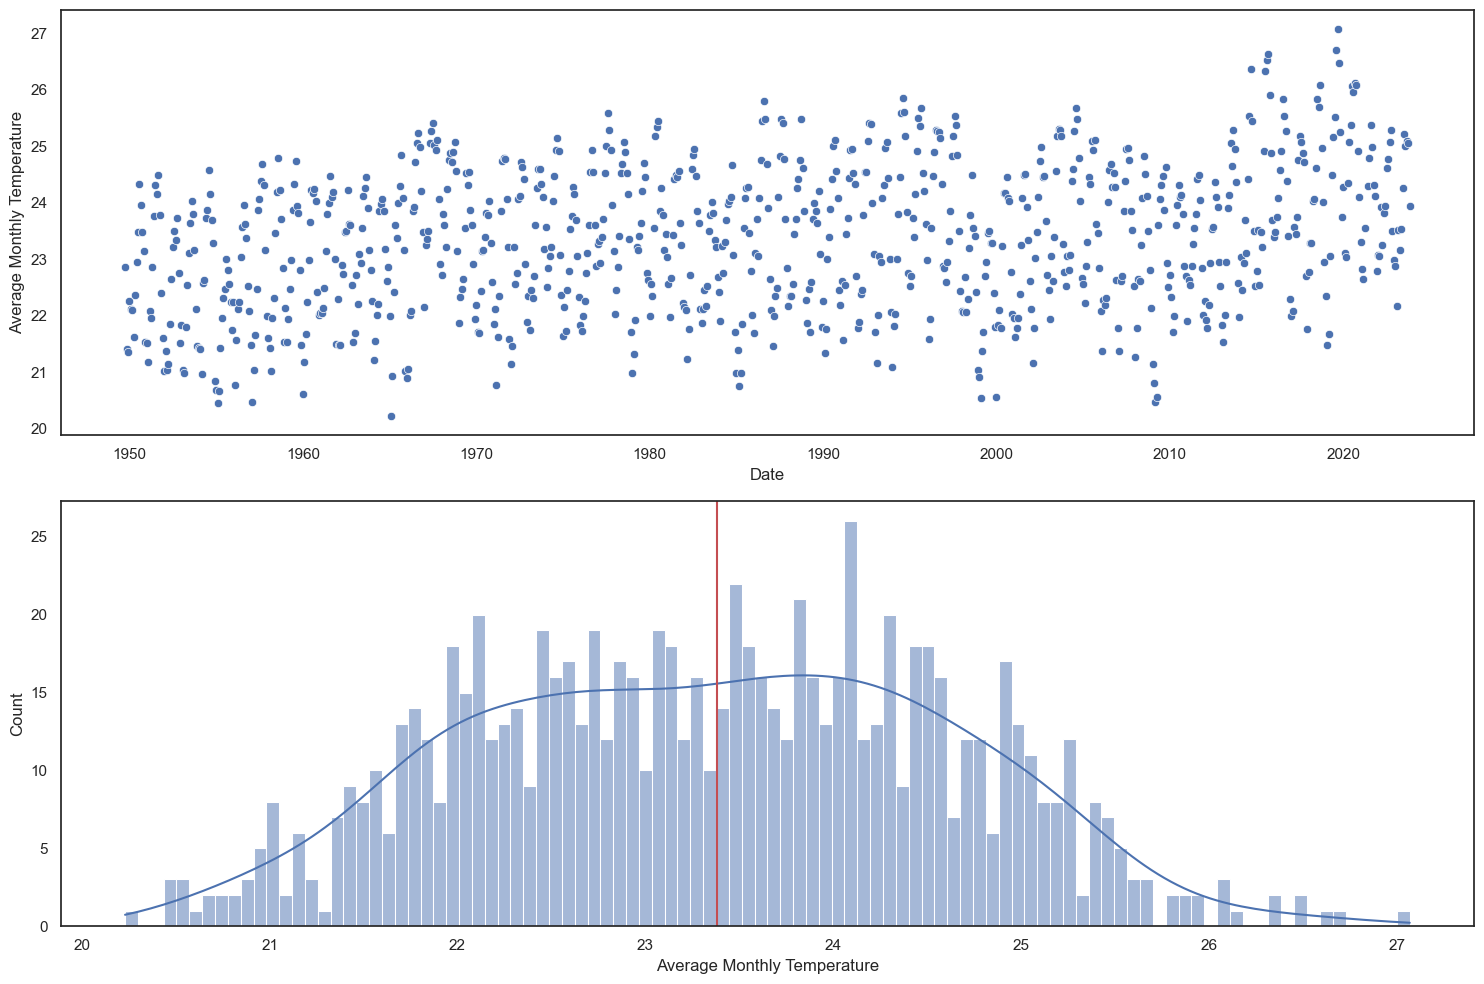

In [15]:
plot_climate(hil)

There does not seem to be any ridculous value present in this data. This method is repeated for the remaining climate datasets and the results are similar. Although there may be outliers, we decided not to replace or omit them as there may be a reason why those data points exist.

### Carbon emission analysis
___
We can apply the function coded above, `plot()`, where the `y_value` is `value` and `df` is the carbon dioxide concentration of each city.

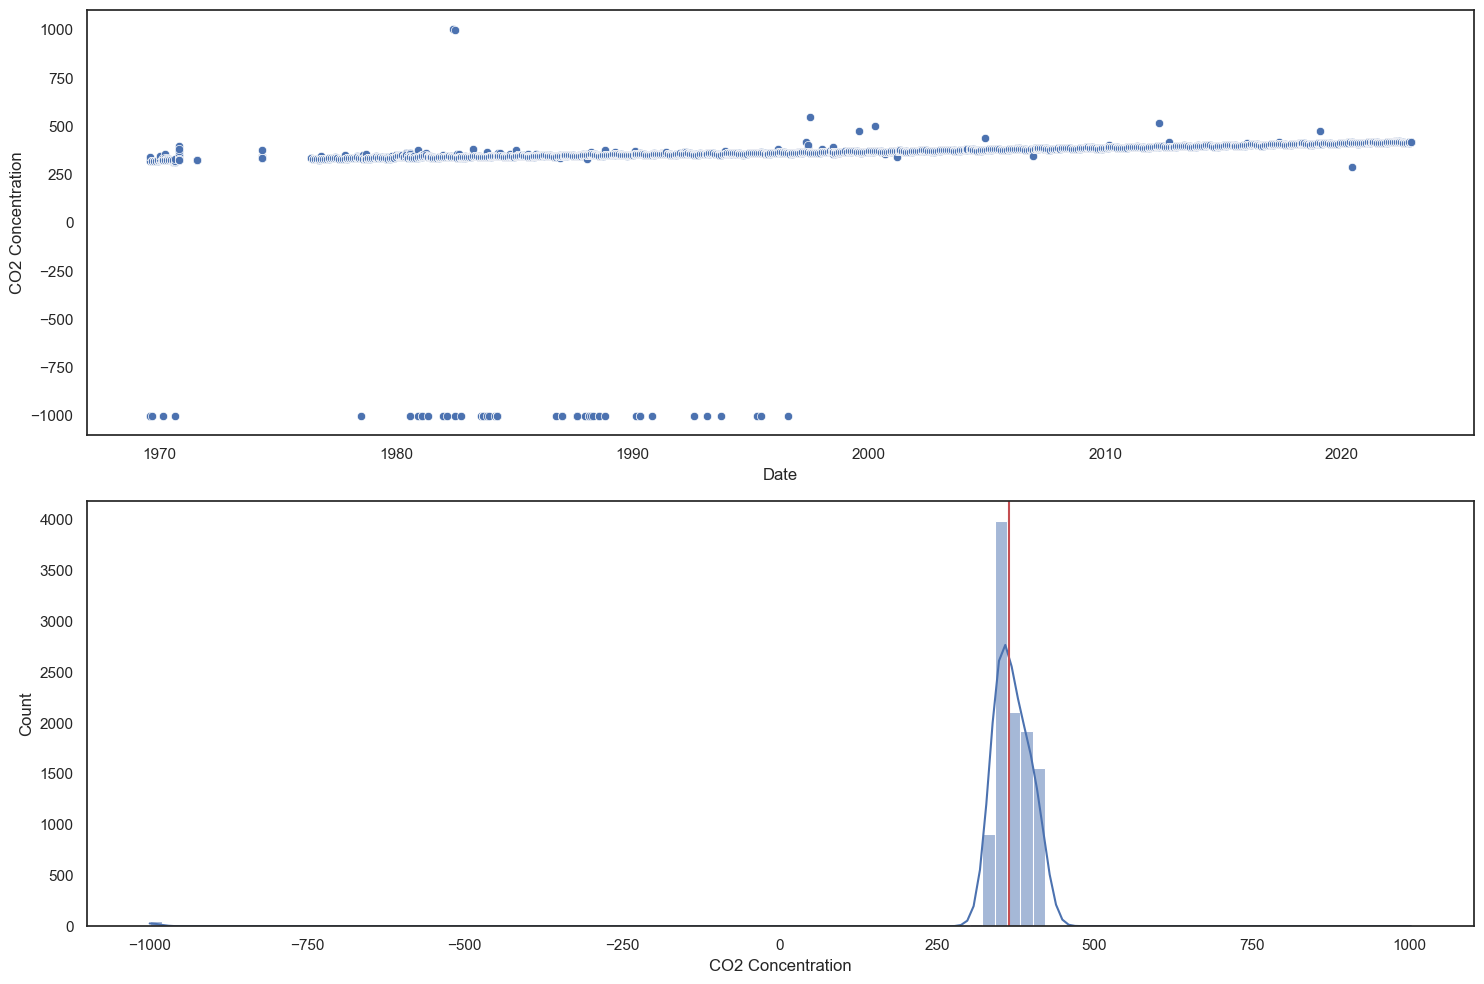

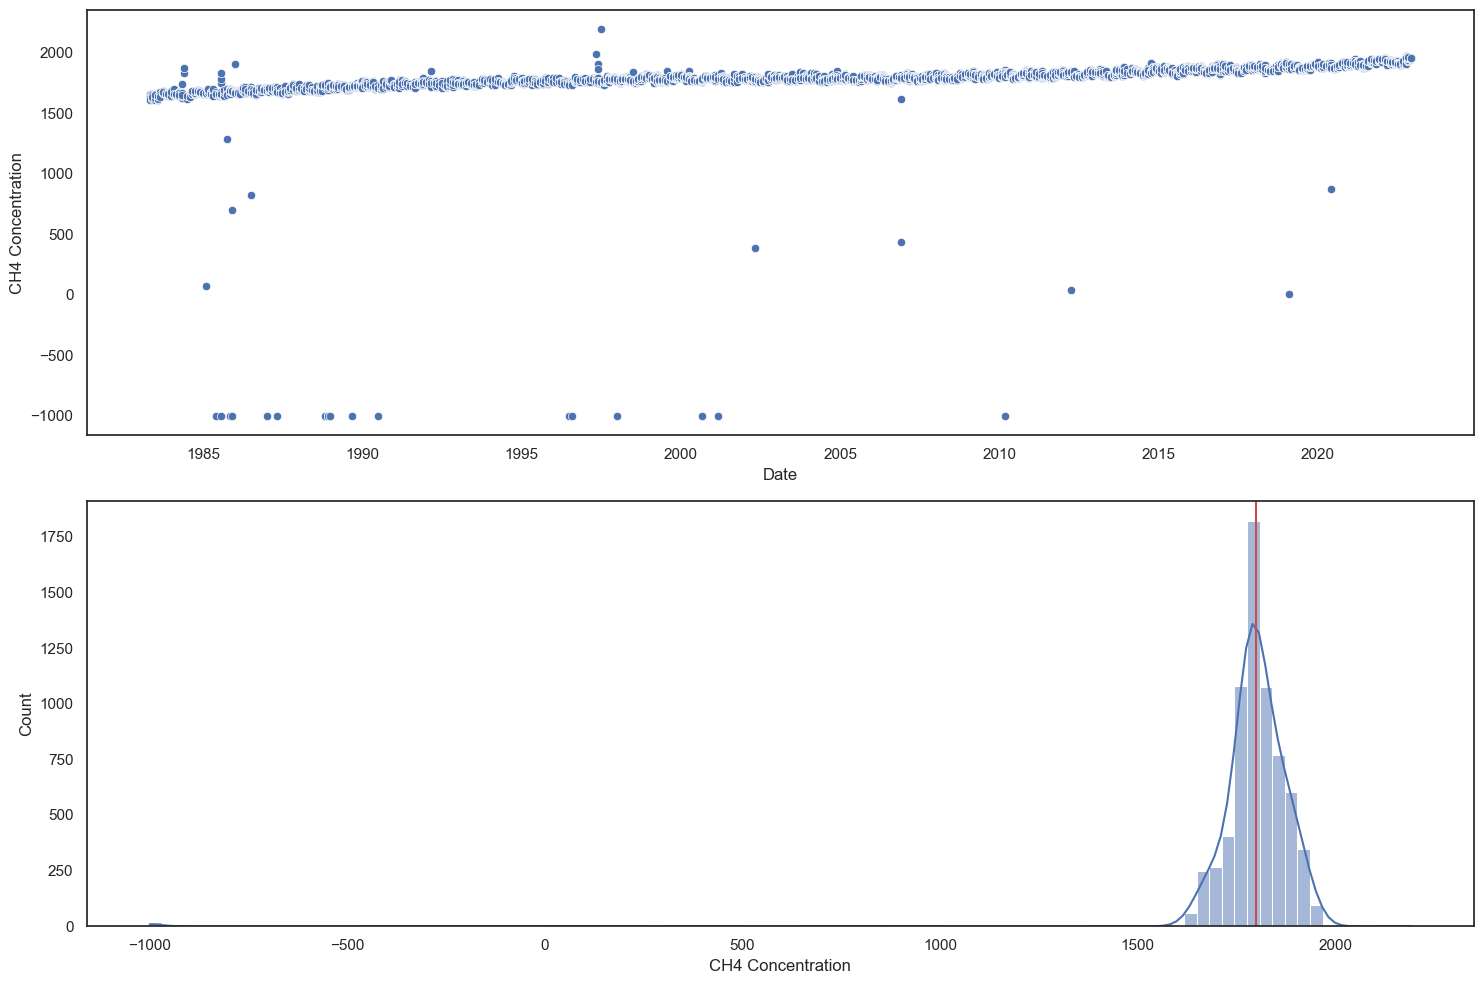

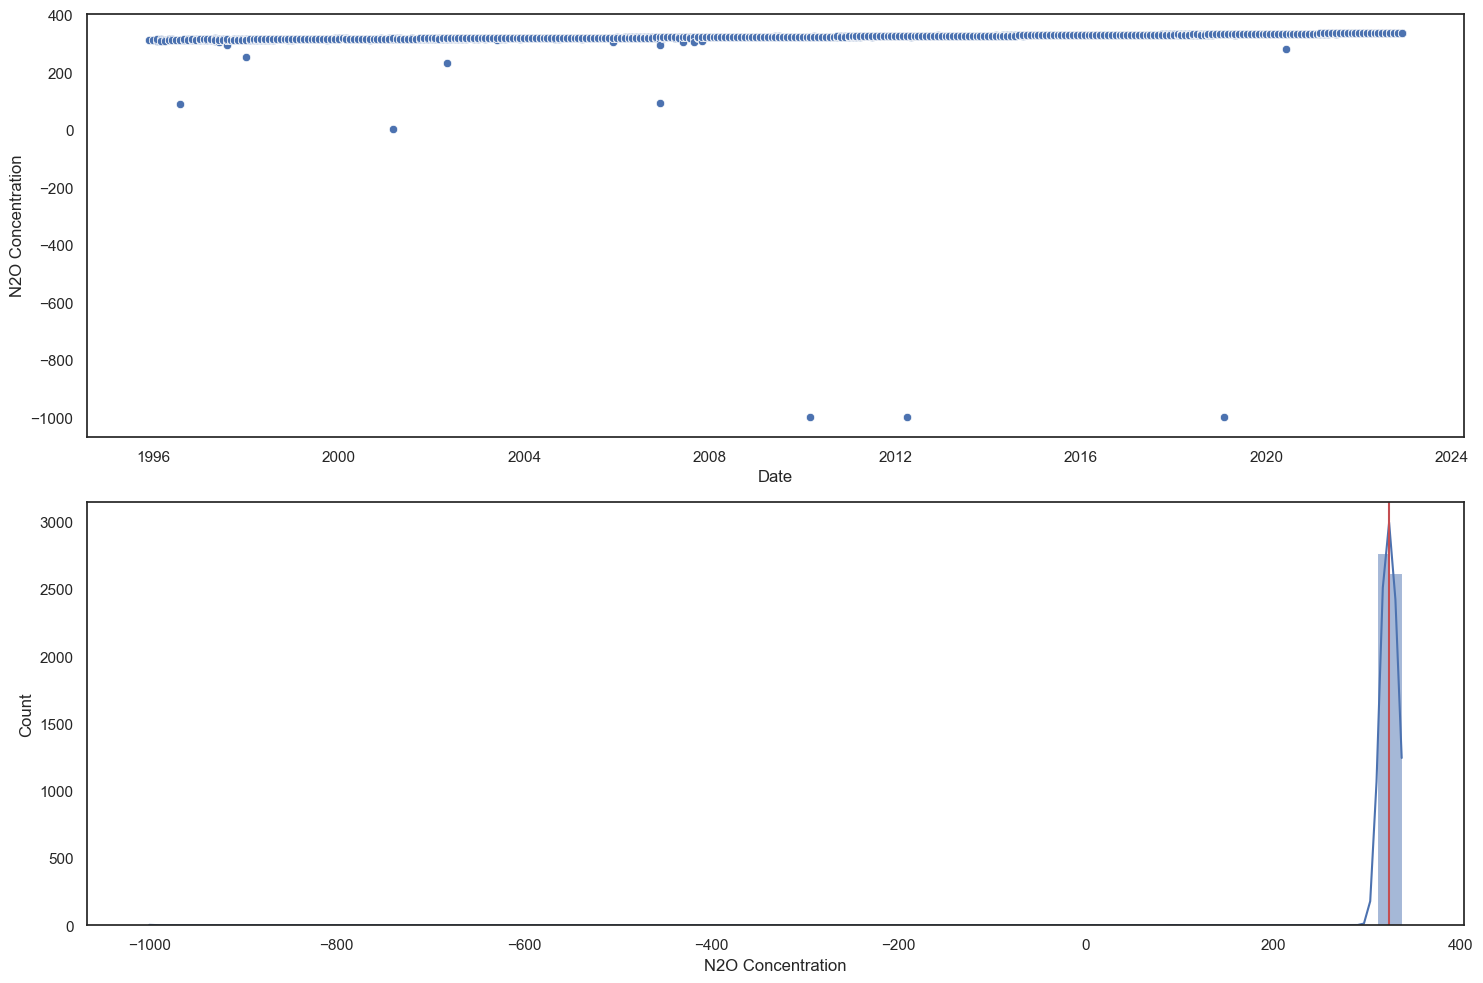

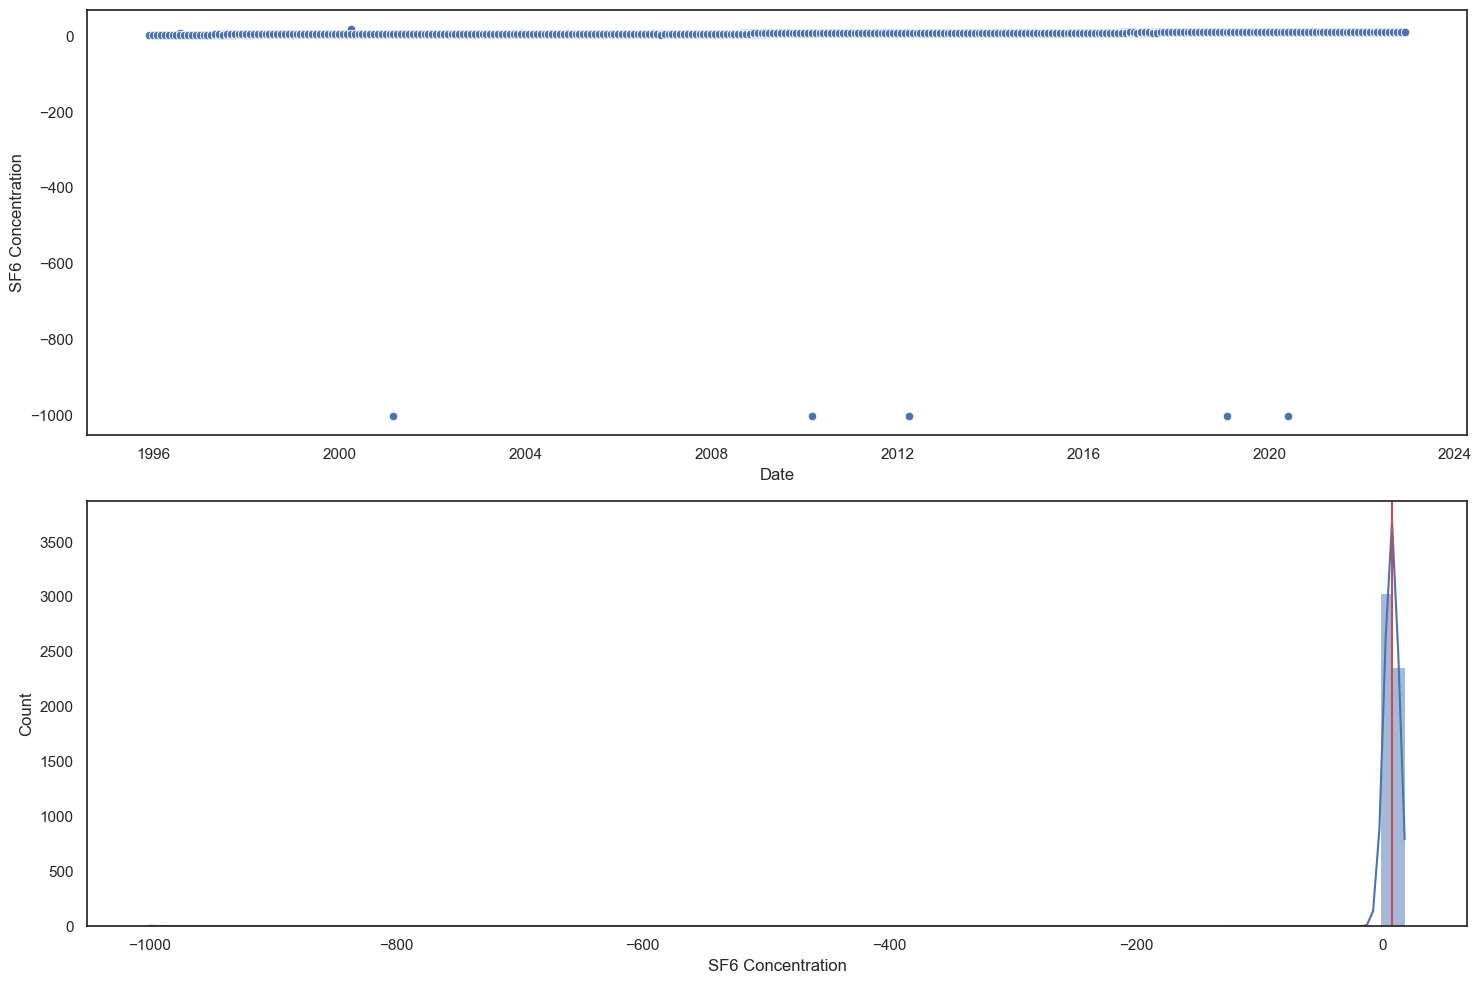

In [16]:
plot('CO2 Concentration', hil_co2)
plot('CH4 Concentration', hil_ch4)
plot('N2O Concentration', hil_n2o)
plot('SF6 Concentration', hil_sf6)

NOAA uses the -999.99 value to represent null values. Therefore we will replace them with the median first. Then we can replace any remaining outliers with the median. This method will prevent an absurd standard deviation caused by the -999.99 values.

In [17]:
def outlier(df, column):
    # Calculate the median
    median = df[column].median()
    # Replace the negative numbers with the median
    df.loc[df[column] < 0, column] = np.nan
    # We will find the outliers that are 3 standard deviations away from the mean
    std = df[column].std()
    outliers = (df[column] - median).abs() > 3*std
    # Replace the outliers with the median
    df.loc[outliers] = np.nan
    df[column].bfill(limit=7)
    
    return df

In [18]:
# Perform the function on all datasets
# Carbon
bou_co2 = outlier(bou_co2, 'CO2 Concentration')
hil_co2 = outlier(hil_co2, 'CO2 Concentration')
hoh_co2 = outlier(hoh_co2, 'CO2 Concentration')
cap_co2 = outlier(cap_co2, 'CO2 Concentration')
los_co2 = outlier(los_co2, 'CO2 Concentration')
san_co2 = outlier(san_co2, 'CO2 Concentration')
ice_co2 = outlier(ice_co2, 'CO2 Concentration')
tem_co2 = outlier(tem_co2, 'CO2 Concentration')
# Methane
bou_ch4 = outlier(bou_ch4, 'CH4 Concentration')
hil_ch4 = outlier(hil_ch4, 'CH4 Concentration')
hoh_ch4 = outlier(hoh_ch4, 'CH4 Concentration')
cap_ch4 = outlier(cap_ch4, 'CH4 Concentration')
los_ch4 = outlier(los_ch4, 'CH4 Concentration')
san_ch4 = outlier(san_ch4, 'CH4 Concentration')
ice_ch4 = outlier(ice_ch4, 'CH4 Concentration')
tem_ch4 = outlier(tem_ch4, 'CH4 Concentration')
# Nitrous Oxide
bou_n2o = outlier(bou_n2o, 'N2O Concentration')
hil_n2o = outlier(hil_n2o, 'N2O Concentration')
hoh_n2o = outlier(hoh_n2o, 'N2O Concentration')
cap_n2o = outlier(cap_n2o, 'N2O Concentration')
los_n2o = outlier(los_n2o, 'N2O Concentration')
san_n2o = outlier(san_n2o, 'N2O Concentration')
ice_n2o = outlier(ice_n2o, 'N2O Concentration')
tem_n2o = outlier(tem_n2o, 'N2O Concentration')
# Sulfur hexafluoride
bou_sf6 = outlier(bou_sf6, 'SF6 Concentration')
hil_sf6 = outlier(hil_sf6, 'SF6 Concentration')
hoh_sf6 = outlier(hoh_sf6, 'SF6 Concentration')
cap_sf6 = outlier(cap_sf6, 'SF6 Concentration')
los_sf6 = outlier(los_sf6, 'SF6 Concentration')
san_sf6 = outlier(san_sf6, 'SF6 Concentration')
ice_sf6 = outlier(ice_sf6, 'SF6 Concentration')
tem_sf6 = outlier(tem_sf6, 'SF6 Concentration')

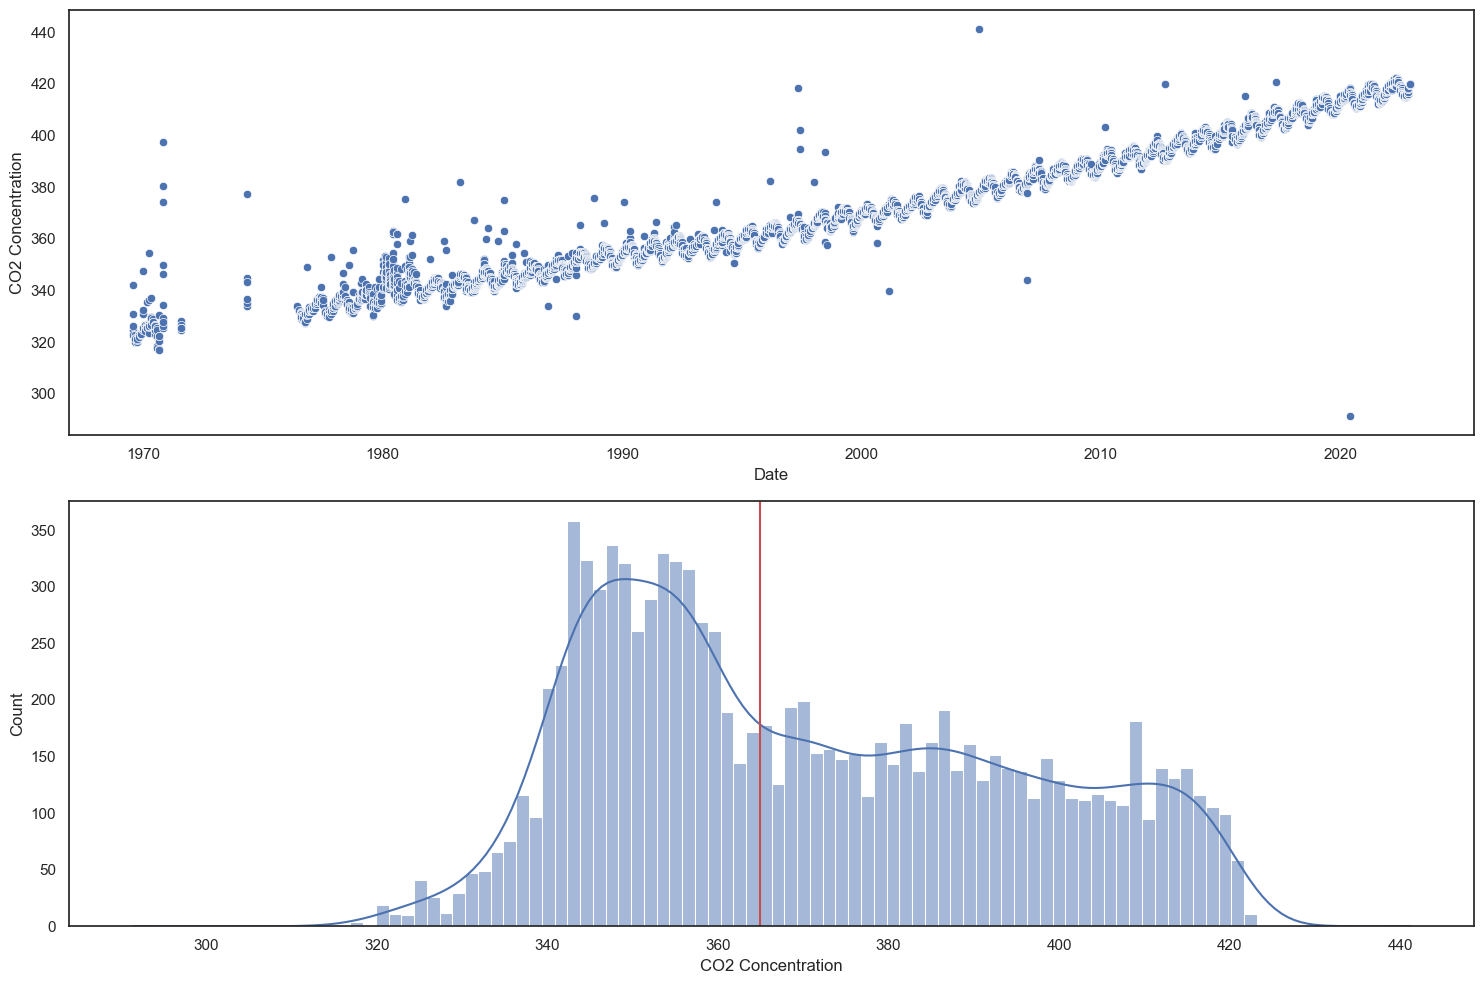

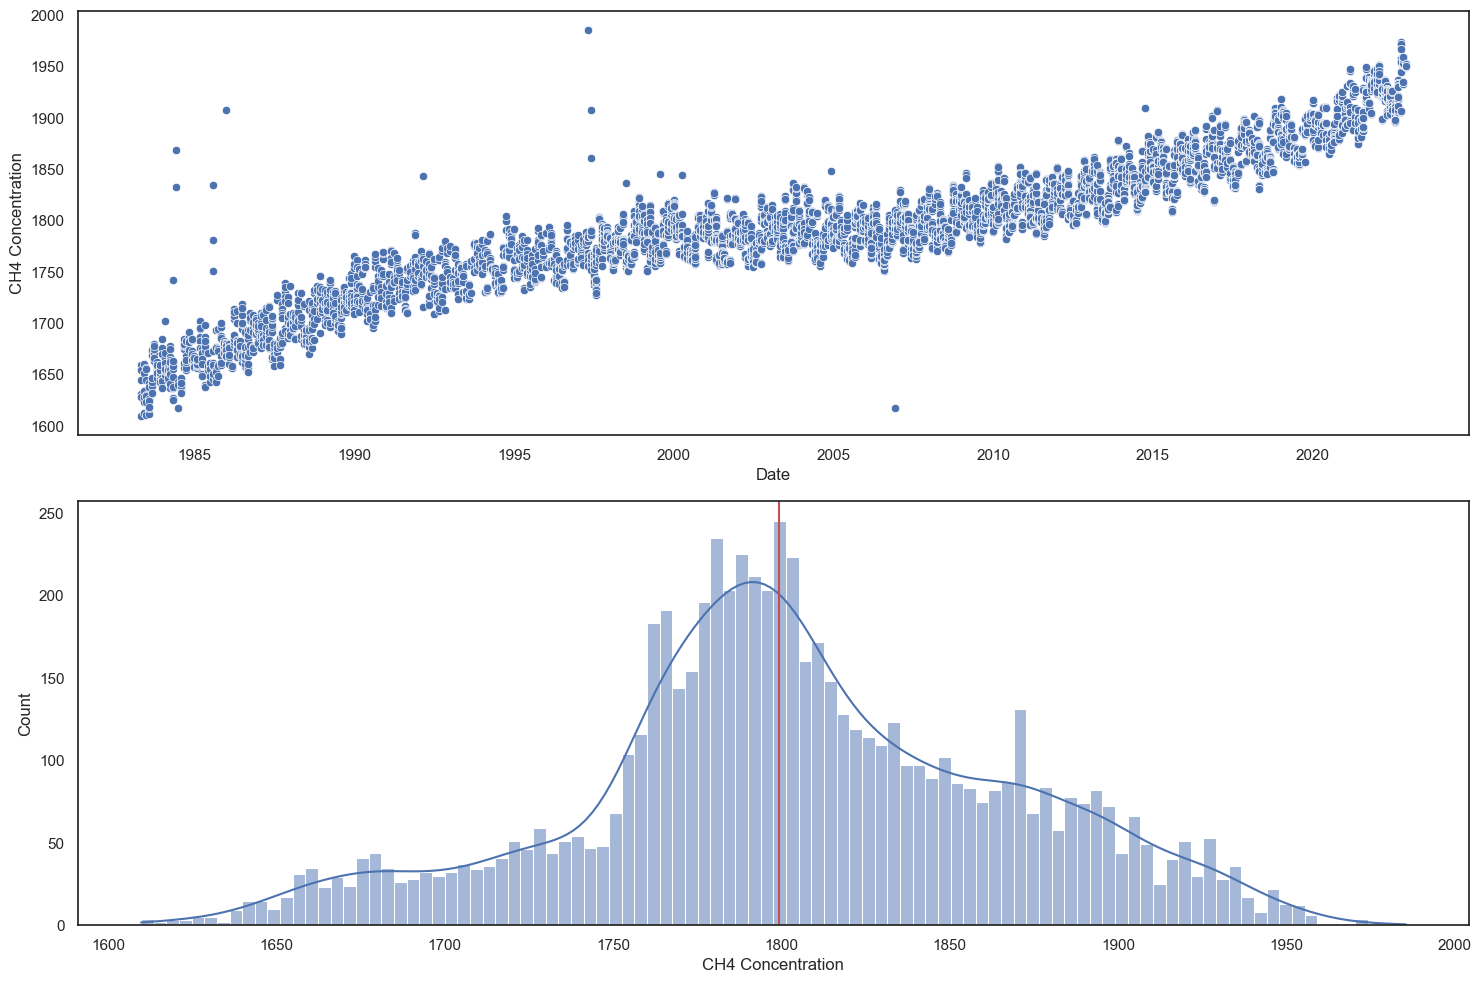

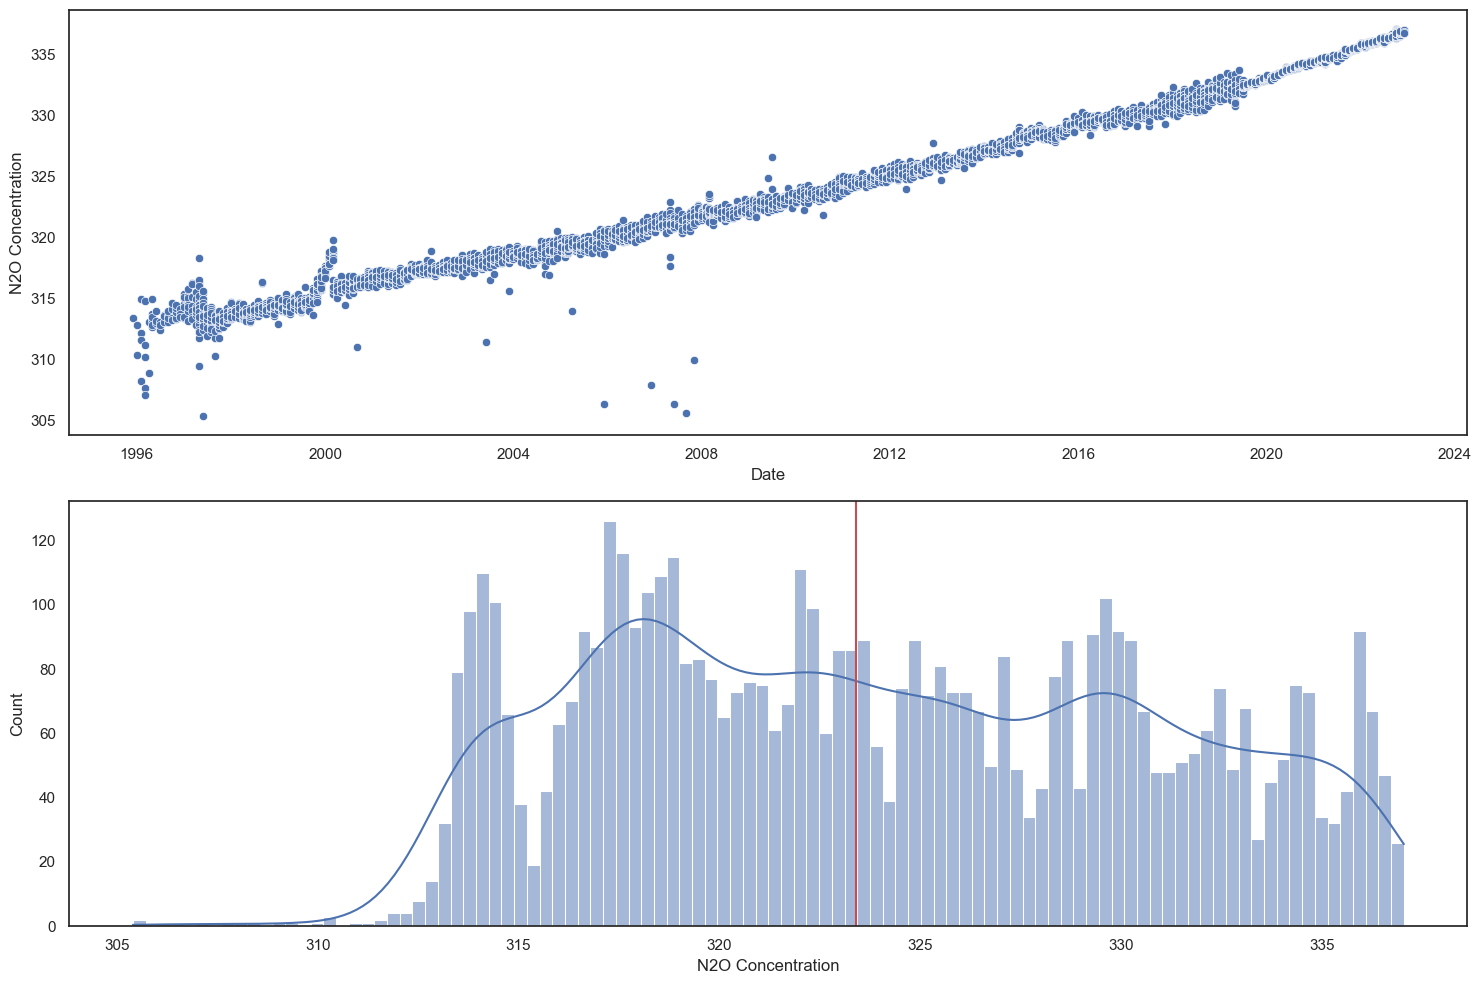

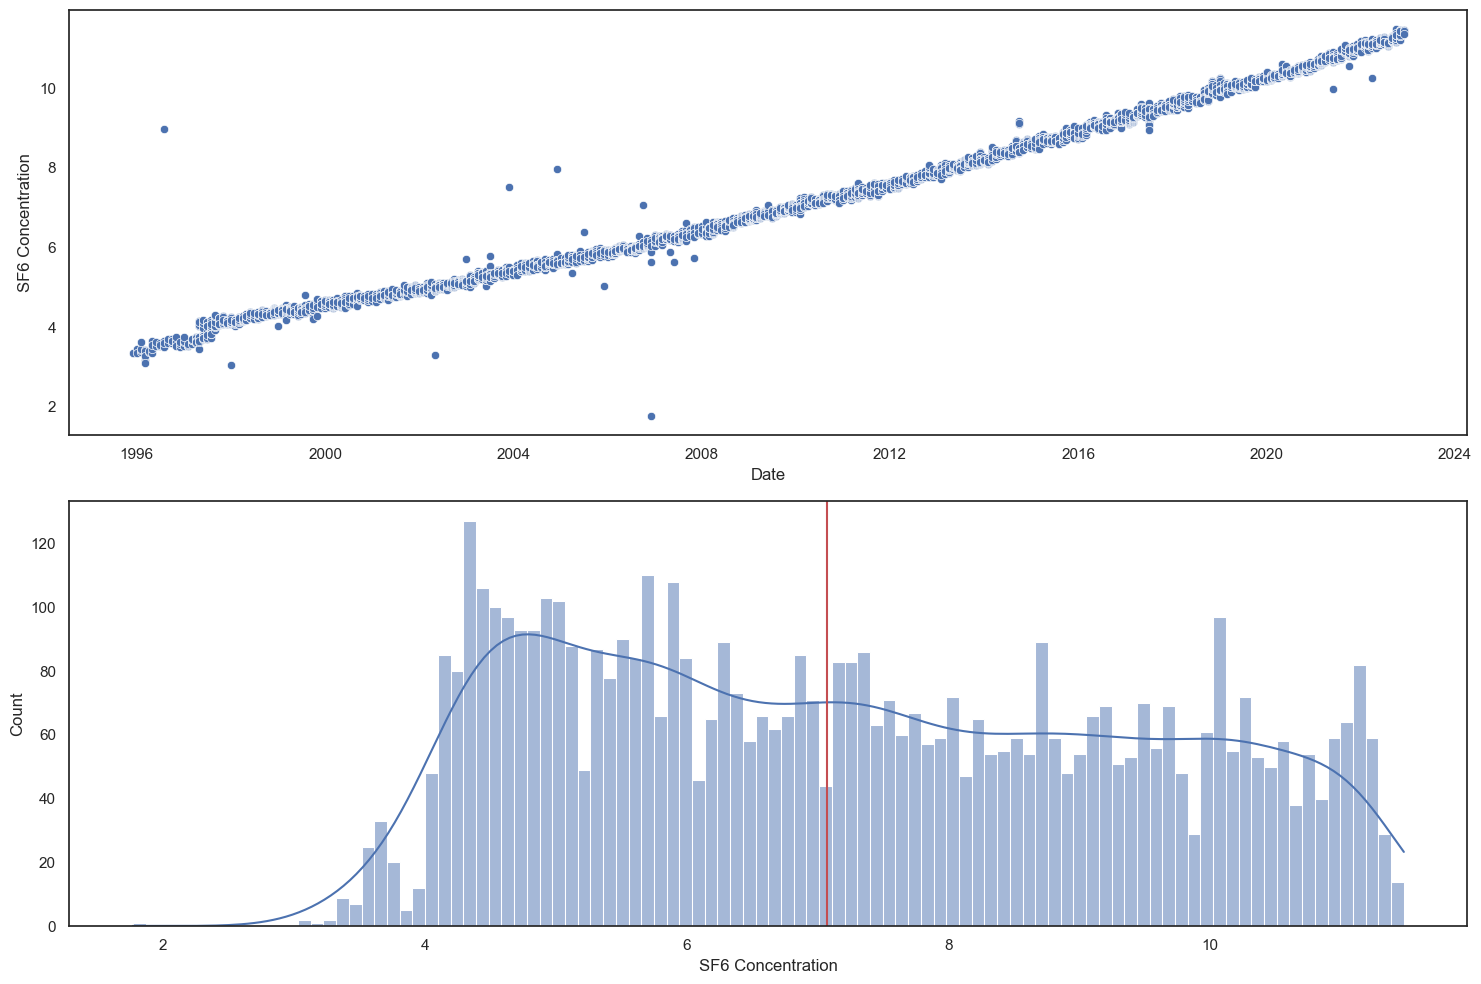

In [19]:
# Plot to observe any changes/improvements
plot('CO2 Concentration', hil_co2)
plot('CH4 Concentration', hil_ch4)
plot('N2O Concentration', hil_n2o)
plot('SF6 Concentration', hil_sf6)

__Using a boxplot for better visualization__
<br>The number of dots in the scatterplot may be overwhelming. We can see the trend a bit easier when using a boxplot.

In [20]:
# Function for a boxplot where the y_value is set 'value' (CO2 concentration) by default
def boxplot(df, title, y_value='CO2 Concentration'):
    sns.set(rc={'figure.figsize':(15,8)})
    sns.set_style('white')
    sns.boxplot(data=df, x=df.index, y=y_value).set_title(title, fontsize=25)
    plt.ylabel('CO2 Emissions')
    plt.xticks(rotation=90)

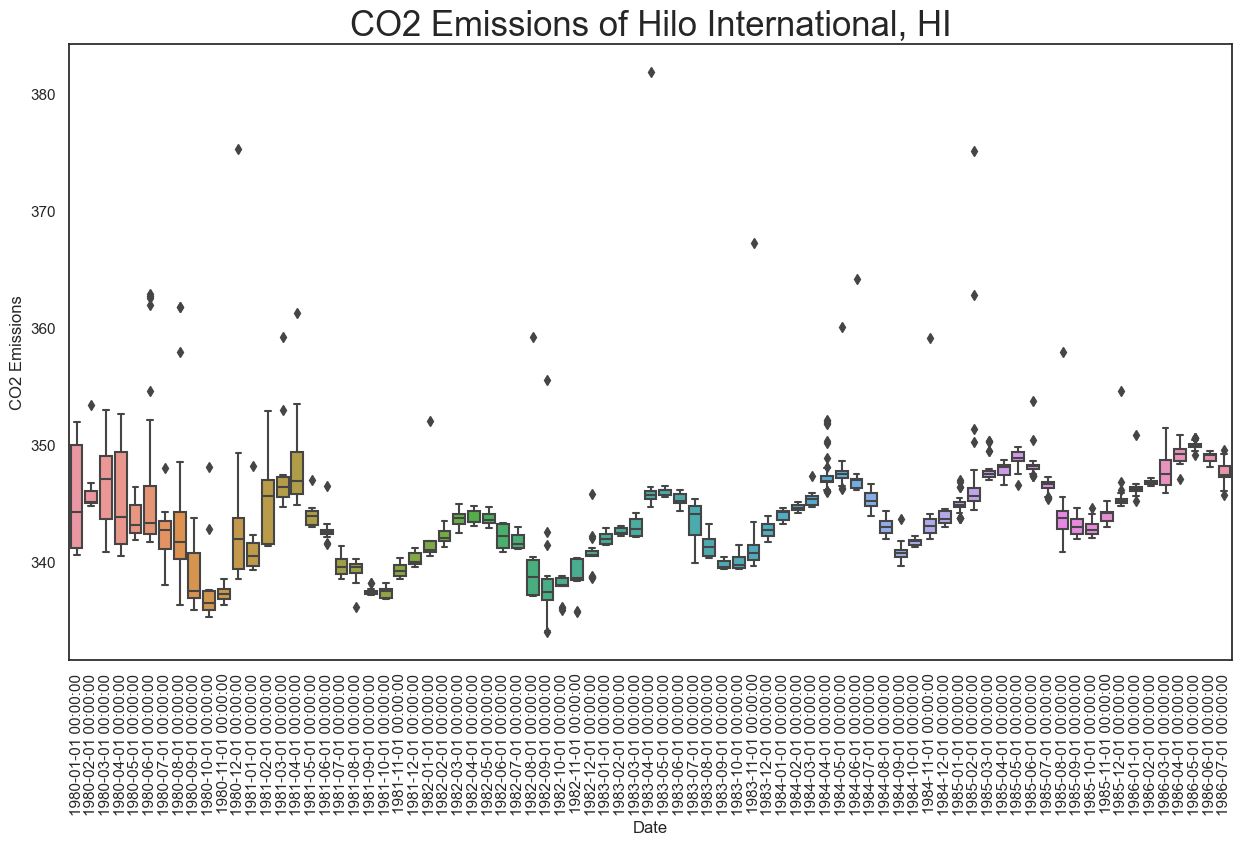

In [21]:
boxplot(hil_co2['1980-01-01':'1986-07-01'], title='CO2 Emissions of Hilo International, HI')

We observe a consistent repeated value in the middle of 360 and 370. This is the median value that was replaced when filling in null values and outliers. Another thing to note is that this carbon emission data is taken from a near by volcano __Mauna Loa__. An active volcano may be the reason why we are still seeing some outliers every month or so.

### Combining climate and emission dataframes
___
In order to create a predictive model for each city, a new dataframe will be created according to the cities where the rows of each column will be replaced by the averages of each month.

In [22]:
def monthly_averages(climate_df, ghg_df):
    # Group the data according to months
    grouper = pd.Grouper(level='Date', freq='M')
    # Create a new dataframe holding the monthly averages of each column
    df = climate_df.groupby(grouper).mean()
    df1 = ghg_df.groupby(grouper).mean()
    # Join the two dataframes
    return df.join(df1, lsuffix='_left', rsuffix='_right', how='outer')

In [23]:
# Repeat the function for each dataframe according to their city.
bou_monthly_co2 = monthly_averages(bou, bou_co2)
hil_monthly_co2 = monthly_averages(hil, hil_co2)
hoh_monthly_co2 = monthly_averages(hoh, hoh_co2)
cap_monthly_co2 = monthly_averages(cap, cap_co2)
los_monthly_co2 = monthly_averages(los, los_co2)
san_monthly_co2 = monthly_averages(san, san_co2)
ice_monthly_co2 = monthly_averages(ice, ice_co2)
tem_monthly_co2 = monthly_averages(tem, tem_co2)

bou_monthly_ch4 = monthly_averages(bou, bou_ch4)
hil_monthly_ch4 = monthly_averages(hil, hil_ch4)
hoh_monthly_ch4 = monthly_averages(hoh, hoh_ch4)
cap_monthly_ch4 = monthly_averages(cap, cap_ch4)
los_monthly_ch4 = monthly_averages(los, los_ch4)
san_monthly_ch4 = monthly_averages(san, san_ch4)
ice_monthly_ch4 = monthly_averages(ice, ice_ch4)
tem_monthly_ch4 = monthly_averages(tem, tem_ch4)

bou_monthly_n2o = monthly_averages(bou, bou_n2o)
hil_monthly_n2o = monthly_averages(hil, hil_n2o)
hoh_monthly_n2o = monthly_averages(hoh, hoh_n2o)
cap_monthly_n2o = monthly_averages(cap, cap_n2o)
los_monthly_n2o = monthly_averages(los, los_n2o)
san_monthly_n2o = monthly_averages(san, san_n2o)
ice_monthly_n2o = monthly_averages(ice, ice_n2o)
tem_monthly_n2o = monthly_averages(tem, tem_n2o)

bou_monthly_sf6 = monthly_averages(bou, bou_sf6)
hil_monthly_sf6 = monthly_averages(hil, hil_sf6)
hoh_monthly_sf6 = monthly_averages(hoh, hoh_sf6)
cap_monthly_sf6 = monthly_averages(cap, cap_sf6)
los_monthly_sf6 = monthly_averages(los, los_sf6)
san_monthly_sf6 = monthly_averages(san, san_sf6)
ice_monthly_sf6 = monthly_averages(ice, ice_sf6)
tem_monthly_sf6 = monthly_averages(tem, tem_sf6)

We have replaced the null values for carbon dioxide concentration but not for climate. Since we have decided to keep the outliers for the climate data, and no ridiculous values exist (observed from the plots above) we can safely replace the null values with their corresponding median values.

Because this is a time series data, there may be noise. We will reduce noise by taking the square root and the squart root of a negative number is imaginary. Converting the temperature to Kelvin will obtain only positive values.

In [24]:
def concatenate(carbon, methane, nitrous, sulfur):
    list_df = [carbon,
               methane['CH4 Concentration'],
               nitrous['N2O Concentration'],
               sulfur['SF6 Concentration']]
    df = pd.concat(list_df, axis=1)
    df['Total Monthly Precipitation'] = df['Total Monthly Precipitation'].fillna(value=None, method='backfill', limit=7)
    df['Average Monthly Temperature'] = df['Average Monthly Temperature'].fillna(value=None, method='backfill', limit=7)
    df[['Average Monthly Temperature']] += 273
    df.dropna(subset=['CO2 Concentration', 'CH4 Concentration', 'N2O Concentration', 'SF6 Concentration'], how='any',inplace=True)
    return df

In [25]:
bou_monthly = concatenate(bou_monthly_co2, bou_monthly_ch4, bou_monthly_n2o, bou_monthly_sf6)
hil_monthly = concatenate(hil_monthly_co2, hil_monthly_ch4, hil_monthly_n2o, hil_monthly_sf6)
hoh_monthly = concatenate(hoh_monthly_co2, hoh_monthly_ch4, hoh_monthly_n2o, hoh_monthly_sf6)
cap_monthly = concatenate(cap_monthly_co2, cap_monthly_ch4, cap_monthly_n2o, cap_monthly_sf6)
los_monthly = concatenate(los_monthly_co2, los_monthly_ch4, los_monthly_n2o, los_monthly_sf6)
san_monthly = concatenate(san_monthly_co2, san_monthly_ch4, san_monthly_n2o, san_monthly_sf6)
ice_monthly = concatenate(ice_monthly_co2, ice_monthly_ch4, ice_monthly_n2o, ice_monthly_sf6)
tem_monthly = concatenate(tem_monthly_co2, tem_monthly_ch4, tem_monthly_n2o, tem_monthly_sf6)

Upon further inspection of the newly formed data, the `Average Monthly Temperature` data stops short compared to the carbon concentration data. Additionally, the carbon concentration data starts later. Because we are trying to predict the climate, given a certain carbon concentration, we will start drop the rows before `1997-10-30` and after `2011-01-01`.

In [26]:
ice_monthly = ice_monthly.loc[(ice_monthly.index > '1997-6-30') & (ice_monthly.index < '2011-01-01')]

In [27]:
# Inspect the dataframes
hil_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1995-12-31 to 2022-12-31
Freq: M
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total Monthly Precipitation  325 non-null    float64
 1   Average Monthly Temperature  325 non-null    float64
 2   CO2 Concentration            325 non-null    float64
 3   CH4 Concentration            325 non-null    float64
 4   N2O Concentration            325 non-null    float64
 5   SF6 Concentration            325 non-null    float64
dtypes: float64(6)
memory usage: 17.8 KB


By running `df.info()` we see that some data have a few null values. Since we are mainly focusing on the `Average Monthly Temperature`, the rows that contain null values in this column are removed.

In [28]:
cap_monthly = cap_monthly[cap_monthly['Average Monthly Temperature'].notna()]
tem_monthly = tem_monthly[tem_monthly['Average Monthly Temperature'].notna()]

__Correlation values between greenhouse gases and temperature/precipitation__

In [29]:
def correlation(df):
    # Table of correlation values with dropped columns and rows to limit redundancy
    return df.corr().drop(columns=['Total Monthly Precipitation', 'Average Monthly Temperature'],
                          index=['CO2 Concentration', 'CH4 Concentration', 'N2O Concentration', 'SF6 Concentration'])

We can use the function above to determine the correlations of each city.

In [30]:
correlation(hil_monthly)

,CO2 Concentration,CH4 Concentration,N2O Concentration,SF6 Concentration
Total Monthly Precipitation,-0.005880,0.068087,0.003084,0.005786
Average Monthly Temperature,0.217292,0.133896,0.268572,0.275677


__Table of correlation values__
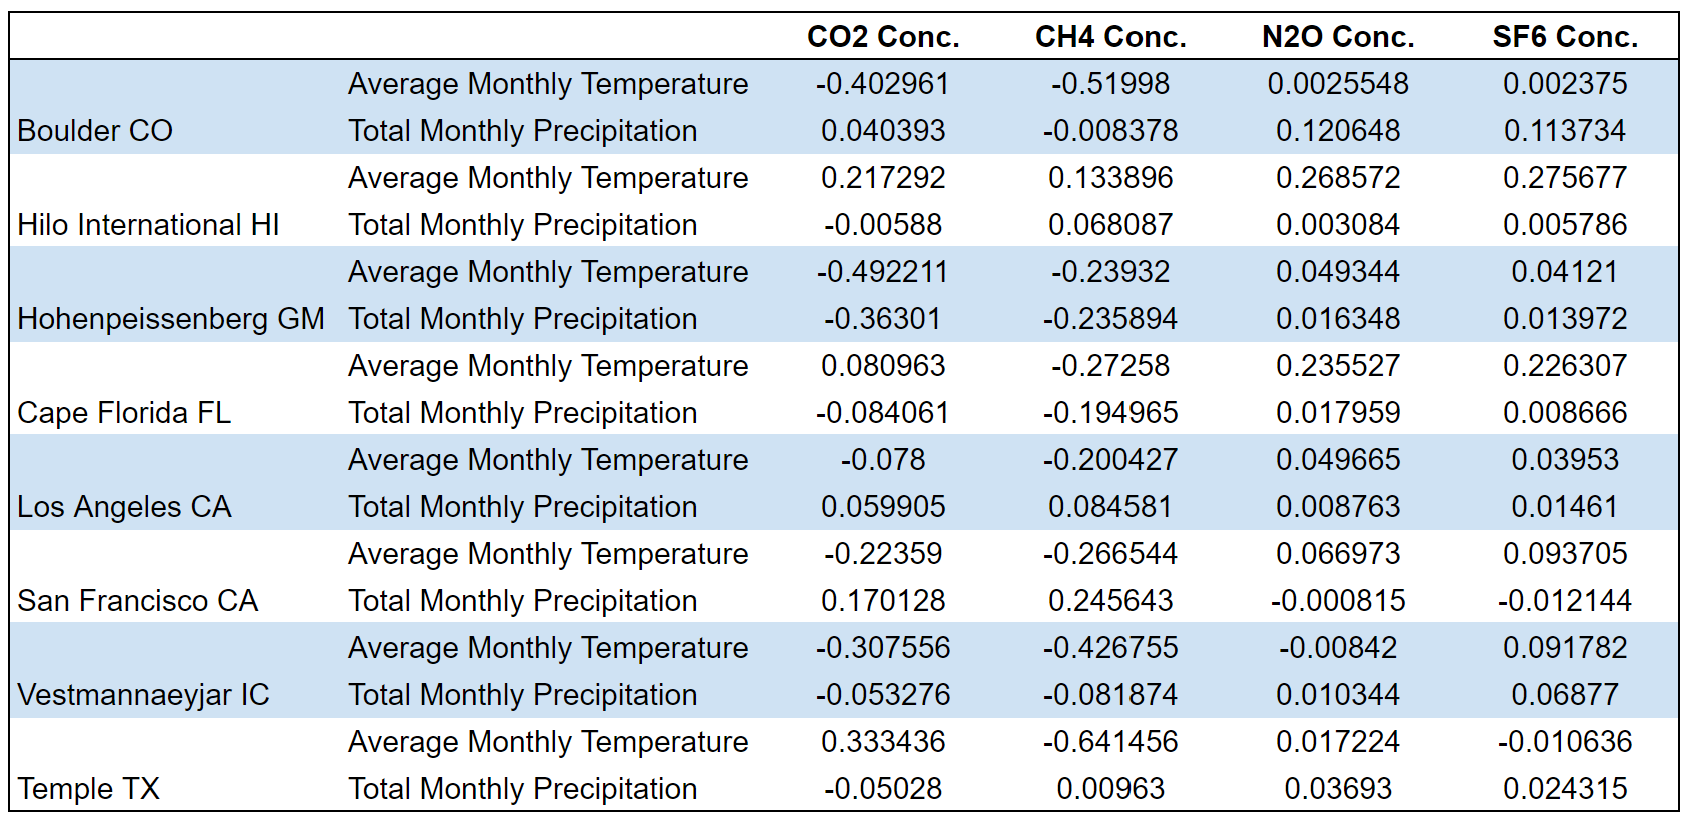
__Correlation between carbon dioxide concentration and temperature__
<br>Interestingly enough, there are negative correlations between the two variables. The only positive correlation is the Hilo International Airport, Hawaii, Cape Florida, Florida, and Temple, Texas, although a very weak one. The higher correlation values may be due to the presence of a nearby volcano (Hawaii and Iceland), or it could be that certain biomes are affected differently.
<br>__Correlation between carbon dioxide concentration and total precipitation__
<br>It is predicted that increasing the content of carbon dioxide will dry out the atmosphere, and as a result lower the amount of humidty and precipitation. Here we see that some cities are positively and negatively correlated.
* One thing to note, these are time series data. Therefore, they may have noise which may explain such low correlation values. We can achieve better results by calculating the rolling mean.

### Getting rid of noise by calculating the rolling mean
___
Both the climate and carbon concentration data have noise, especially data collected from Hawaii. Because the carbon emission data is collected near a volcano, certain months have a spike in carbon concentration. To reduce these abnormalities and the potential affects it has on climate, we will take the rolling mean of the variables listed below. Then the correlation will be recalculated.

In [31]:
variables = ['Total Monthly Precipitation',
             'Average Monthly Temperature',
             'CO2 Concentration', 
             'CH4 Concentration', 
             'N2O Concentration', 
             'SF6 Concentration']

In [32]:
def rolling_mean(df, variable):
    # a sqrt transformation is used due to the presence of zero values
    data = pd.Series(np.sqrt(df[variable]), index=df.index)
    # use the exponentially wieghted moving averages
    roll_mean = data.ewm(halflife=4).mean()
    data_minus_roll_mean = data - roll_mean
    data_diff = data_minus_roll_mean.diff(periods=12)
    return roll_mean, data_diff

In [33]:
# Create a dataframe of rolling mean by using the function above
bou_roll = pd.DataFrame(index=bou_monthly.index)
hil_roll = pd.DataFrame(index=hil_monthly.index)
hoh_roll = pd.DataFrame(index=hoh_monthly.index)
cap_roll = pd.DataFrame(index=cap_monthly.index)
los_roll = pd.DataFrame(index=los_monthly.index)
san_roll = pd.DataFrame(index=san_monthly.index)
ice_roll = pd.DataFrame(index=ice_monthly.index)
tem_roll = pd.DataFrame(index=tem_monthly.index)
bou_minus_roll = pd.DataFrame(index=bou_monthly.index)
hil_minus_roll = pd.DataFrame(index=bou_monthly.index)
hoh_minus_roll = pd.DataFrame(index=bou_monthly.index)
cap_minus_roll = pd.DataFrame(index=bou_monthly.index)
los_minus_roll = pd.DataFrame(index=bou_monthly.index)
san_minus_roll = pd.DataFrame(index=bou_monthly.index)
ice_minus_roll = pd.DataFrame(index=bou_monthly.index)
tem_minus_roll = pd.DataFrame(index=bou_monthly.index)

# For loop that takes the rolling mean for each variable listed above
for x in variables:
    bou_roll[x], bou_minus_roll[x] = rolling_mean(bou_monthly, variable=x)
    hil_roll[x], hil_minus_roll[x] = rolling_mean(hil_monthly, variable=x)
    hoh_roll[x], hoh_minus_roll[x] = rolling_mean(hoh_monthly, variable=x)
    cap_roll[x], cap_minus_roll[x] = rolling_mean(cap_monthly, variable=x)
    los_roll[x], los_minus_roll[x] = rolling_mean(los_monthly, variable=x)
    san_roll[x], san_minus_roll[x] = rolling_mean(san_monthly, variable=x)
    ice_roll[x], ice_minus_roll[x] = rolling_mean(ice_monthly, variable=x)
    tem_roll[x], tem_minus_roll[x] = rolling_mean(tem_monthly, variable=x)

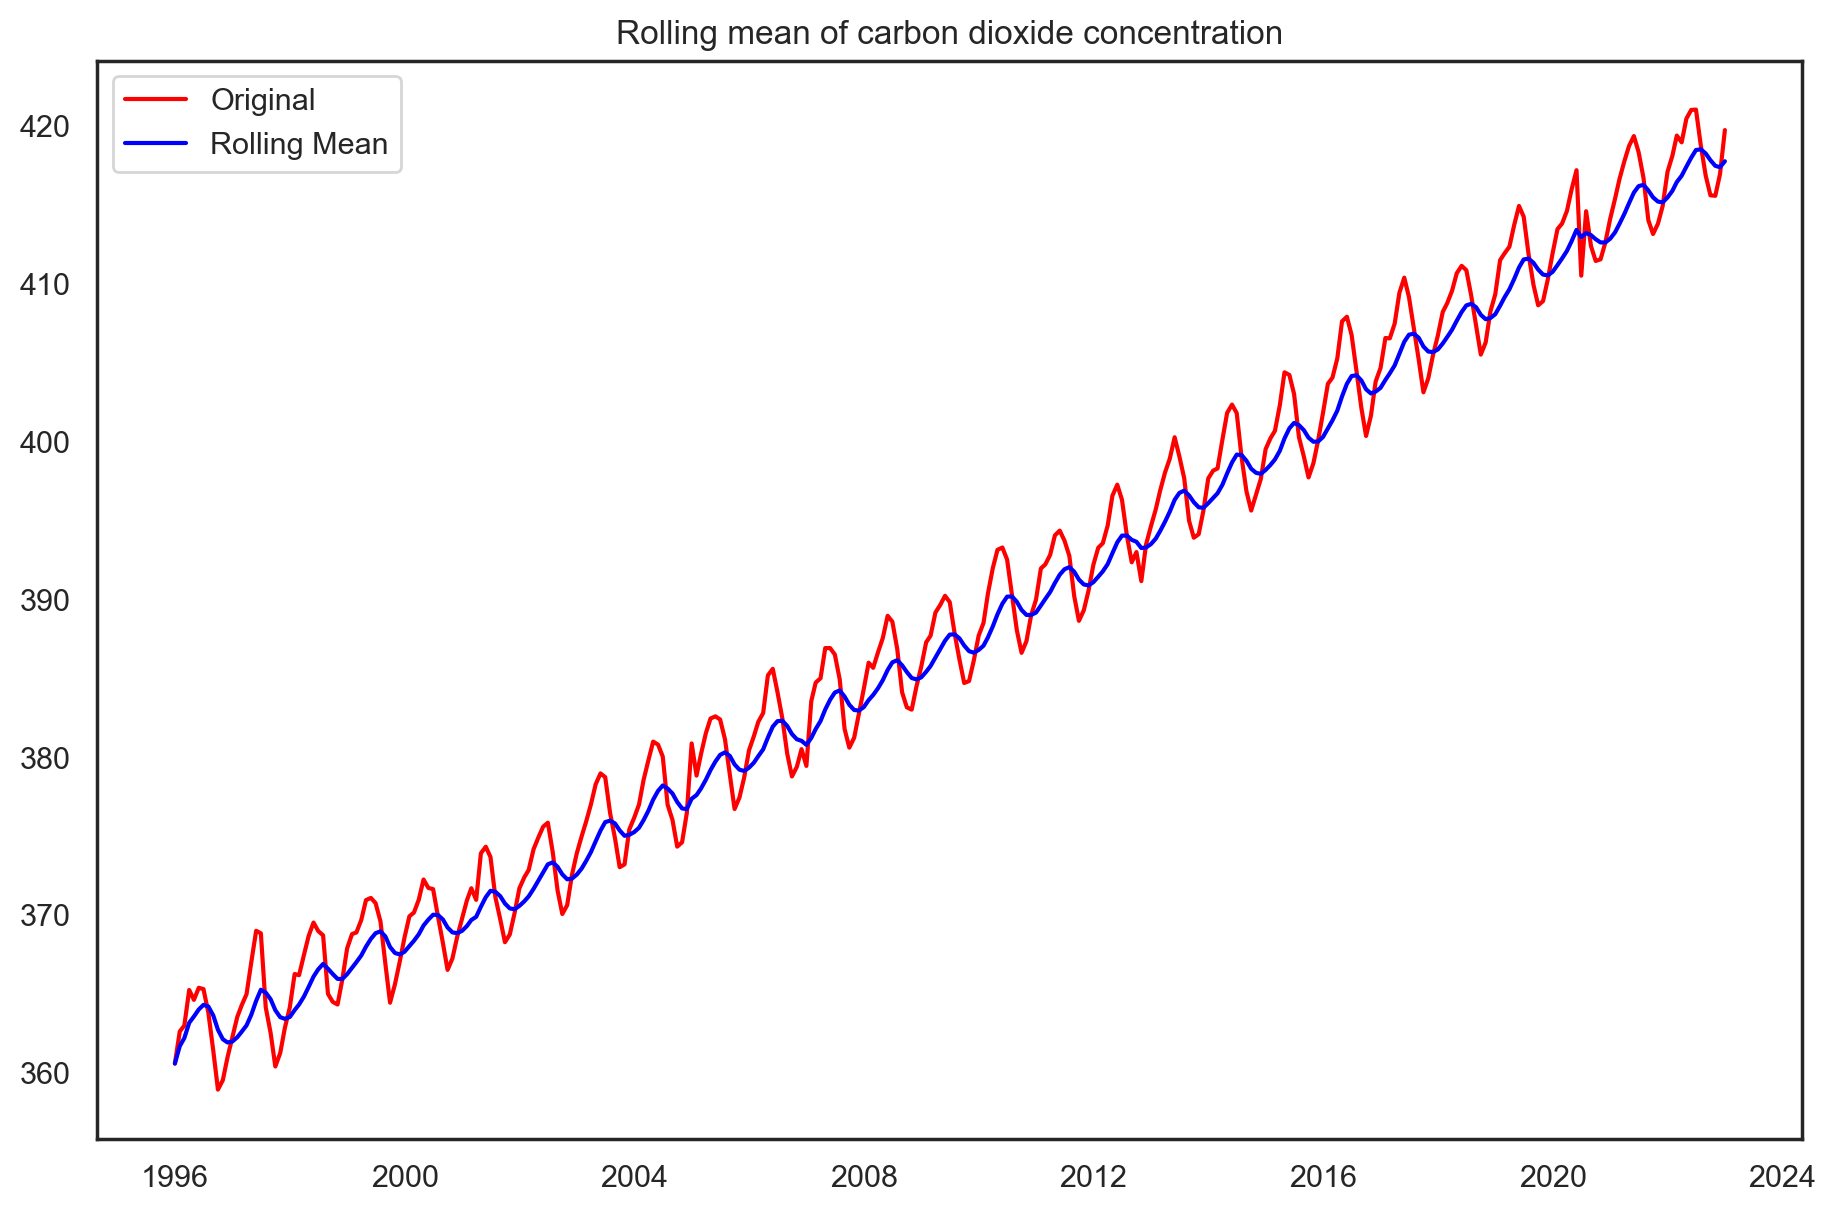

In [34]:
# Plot the transformed values
fig = plt.figure(figsize=(11,7), dpi=200)
plt.plot(hil_monthly['CO2 Concentration'], color='red', label='Original')
plt.plot(hil_roll['CO2 Concentration']**2, color='blue', label='Rolling Mean')
plt.title('Rolling mean of carbon dioxide concentration')
plt.legend(loc='best')

plt.show(block=False)

The data does seem to be less noisy although there is still seasonality in the data. To check if the data is stationary, we can plot the dataframe holding the subtracted means, `df_minus_roll`.

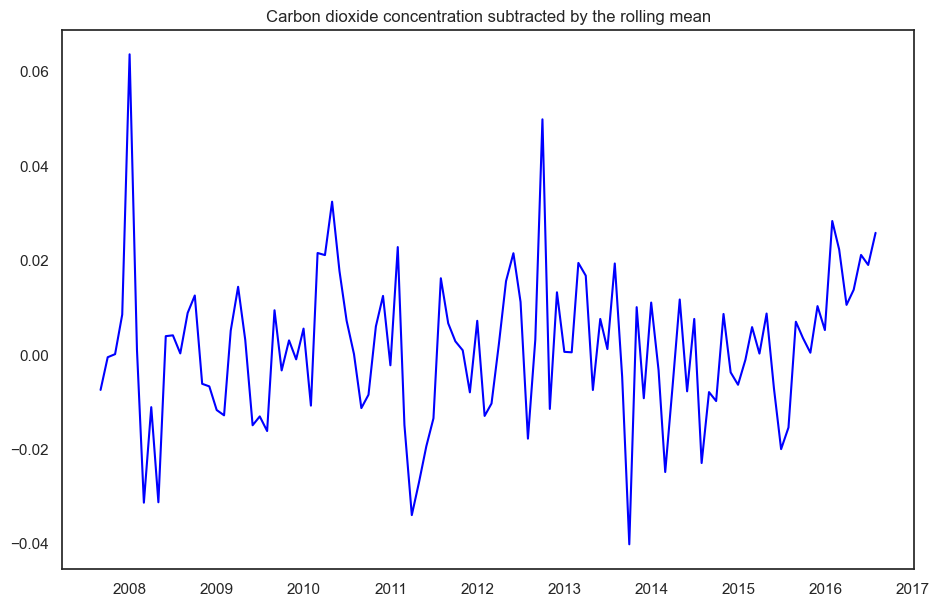

In [35]:
fig = plt.figure(figsize=(11,7))
plt.plot(hil_minus_roll['CO2 Concentration'], color='blue')
plt.title('Carbon dioxide concentration subtracted by the rolling mean')

plt.show(block=False)

It appears to be stationary but we can check further by performing the Dickey-Fuller test to calculate the p-value. If the p-value is lower than 0.05, we can confidently say that it is stationary. The p-value will be calculated by using `adfuller()` from `statsmodels`.

In [36]:
from statsmodels.tsa.stattools import adfuller

def stationarity_check(df):
    
    dftest = adfuller(df)
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [37]:
# Run the stationarity check to determine if the data is stationary
# Some dataframes have null values, this can be fixed by adding .dropna()
stationarity_check(hil_minus_roll['CO2 Concentration'].dropna())

Test Statistic                 -3.322168
p-value                         0.013916
#Lags Used                     11.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


We are able to create stationary data for all columns except for the average monthly temperature of San Francisco (`san_minus_roll['Average Monthly Temperature']`). However, the rest of the data is ready for modeling.

__Correlation after reducing noise__
<br>Before creating a model, we will recalculate the correlation in hopes to see if the correlations are stronger.

In [38]:
correlation(hil_roll)

,CO2 Concentration,CH4 Concentration,N2O Concentration,SF6 Concentration
Total Monthly Precipitation,0.027330,0.085213,0.029167,0.02321
Average Monthly Temperature,0.499129,0.505660,0.513138,0.49213


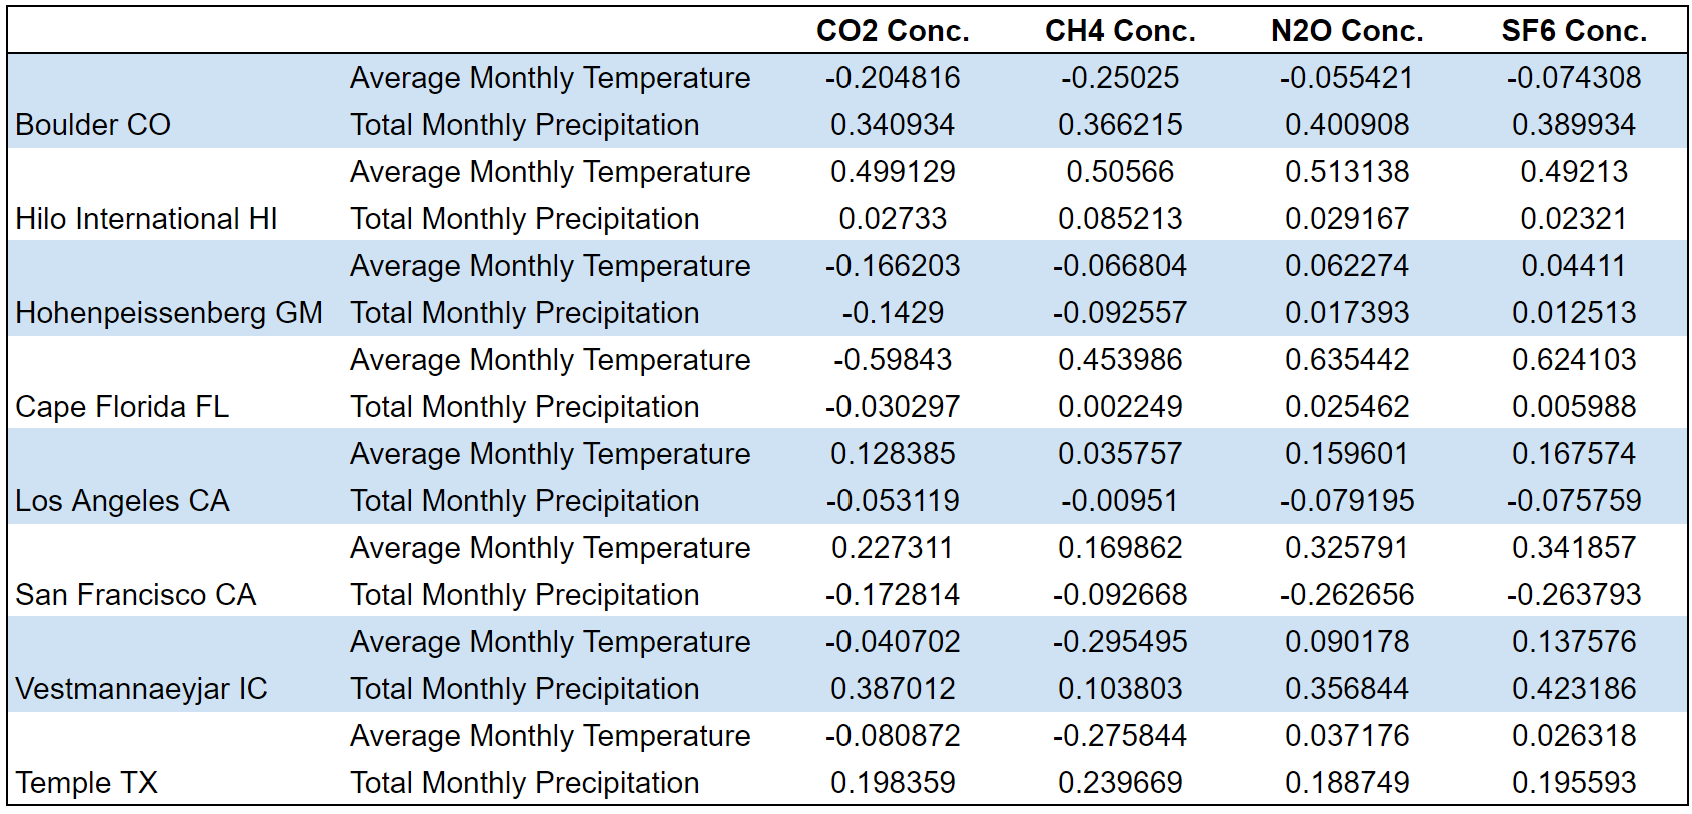
<br>__Correlation between carbon dioxide and temperature/precipitation__
<br>The correlation between temperature and carbon dioxide seem to have gotten stronger. However there are few cities with a relatively weak correlation between precipitation and CO2 emission (Hilo International, Cape Florida, Los Angeles). According to [this article](https://www.downtoearth.org.in/news/climate-change/rising-co2-can-lead-to-drier-amazon-and-bring-more-rain-in-african-and-pacific-forests-60682#:~:text=Scientists%20have%20discovered%20another%20factor,in%20African%20and%20Indonesian%20forests.), the rising carbon dioxide level in the Amazon leads to more rainfall in African and Pacific forests. The article sites a [study](https://www.nature.com/articles/s41558-018-0144-7), where the stomata of the leaves do not have to open so widely in the presence of carbon dioxide. As a result, transpiration (process in which leaves lose water through the stomata) decreases. This leads to drier climates, but as the surface temperature increases, some areas may experience more rainfall due to trade winds now able to hold more moisture. This may be the reason why some areas like Hilo International are experiencing more precipitation.

# Linear regression model
___
Now that the noise of the data is limited, we will start with a simple linear regression model as the temperature and precipitation should not be changing expontentially or polynomially. The performance of the model will be measured by calculating the mean squared error.

In [39]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [40]:
# Function that creates a linear regression and returns the results of the model
def regression(df, target, feature):
    #set the y equal to the target
    y = df[target]
    #the X_baseline is feature
    X_baseline = df[feature]
    #create the linear model and store results in baseline_results
    baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
    baseline_results = baseline_model.fit()
    #return the summary of results so we can observe the r-squared value
    #additionly return the mean squared error of the model
    print(baseline_results.summary(),
          '\nMean squared error:',mean_squared_error(y, baseline_results.predict(sm.add_constant(X_baseline)), squared=False))
    return baseline_results

__Temperature vs. carbon dioxide concentration__
<br>We can run the function above and store the results.

In [41]:
# Define the feature and targets
feature = ['CO2 Concentration', 'CH4 Concentration', 'N2O Concentration', 'SF6 Concentration']
target = ['Total Monthly Precipitation',
          'Average Monthly Temperature']

results = regression(hil_roll, 'Average Monthly Temperature', feature)

                                 OLS Regression Results                                
Dep. Variable:     Average Monthly Temperature   R-squared:                       0.355
Model:                                     OLS   Adj. R-squared:                  0.347
Method:                          Least Squares   F-statistic:                     44.12
Date:                         Mon, 29 Jan 2024   Prob (F-statistic):           1.75e-29
Time:                                 12:49:20   Log-Likelihood:                 882.78
No. Observations:                          325   AIC:                            -1756.
Df Residuals:                              320   BIC:                            -1737.
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

The regression function can be repeated for other dataframes by replacing the `hil_roll` to another dataframe holding the rolling means. The results are listed below:

|Site |	Adj. R-squared | Const (p-value) | CO2 coef (p-value) | CH4 coef (p-value) | N2O coef (p-value) | SF6 coef (p-value) | MSE |
|---|----------|---------|-----------|-----------|--------|-------|--------|
| Boulder CO | 0.484 | -97.0531 (0.002) | -1.6872 (0.000) | -0.1930 (0.008) | 9.0477 (0.000) | -2.5940 (0.005) | 0.06323 |
| Hilo International HI | 0.347 | 7.2983 (0.000) | -0.0379 (0.271) | -0.0277 (0.001) | 0.6904 (0.000) | -0.2136 (0.000) | 0.01599 |
|Hohenpeissenberg GM | 0.84 | -0.9966 (0.769) | -0.7881 (0.000) | -0.0655 (0.022) | 2.0145 (0.000) | -0.0228 (0.824) | 0.02578 |
|Cape Florida FL | 0.699 | -5.6653 (0.014) | -0.1639 (0.000) | -0.1218 (0.000) | 1.8146 (0.000) | -0.4575 (0.000) | 0.02188 |
|Los Angeles CA | 0.328 | 17.8648 (0.008) | -0.3802 (0.008) | -0.2055 (0.000) | 0.8132 (0.045) | 0.3774 (0.118) | 0.02972 |
|San Francisco CA | 0.651 | 24.9379 (0.000) | -0.5451 (0.000) | 0.0231 (0.000) | 0.0150 (0.940) | 0.5714 (0.000) | 0.01492 |
|Vestmannaeyjar IC | 0.674 | 26.0951 (0.000) | -0.4684 (0.000) | -0.1554 (0.000) | 0.2887 (0.116) | 0.5264 (0.000) | 0.02197 |
|Temple TX | 0.8 | 18.2069 (0.004) | -0.7609 (0.000) | -0.2786 (0.000) | 1.3353 (0.000) | 0.7636 (0.000) | 0.03031 |

The constants have a p-value of 0.000 whereas the p-value for the slope is higher than 0.05 (`Boulder`, `Los Angeles`, `Temple`). This means that these slope values are most likely due to chance. We can visualize how well the linear model fits by graphing a scatterplot of the data with the linear results. The R-squared value tells us that the model is able to explain only a relatively small percentage of the variance (`Cape Florida` and `Vestmannaeyjar` being the highest).

We can see that the model does not fit the data very well. Perhaps the linear model will perform better with the precipitation data instead.

__Precipitation vs. carbon dioxide concentration__
<br>We can repeat the same procedure to fit the precipitation data.

In [42]:
# Fit the precipitation data
precipitation_results = regression(hil_roll, 'Total Monthly Precipitation', feature)

                                 OLS Regression Results                                
Dep. Variable:     Total Monthly Precipitation   R-squared:                       0.054
Model:                                     OLS   Adj. R-squared:                  0.042
Method:                          Least Squares   F-statistic:                     4.552
Date:                         Mon, 29 Jan 2024   Prob (F-statistic):            0.00137
Time:                                 12:49:20   Log-Likelihood:                -602.06
No. Observations:                          325   AIC:                             1214.
Df Residuals:                              320   BIC:                             1233.
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

The metrics of the data can be seen below:

| Site| Adj. R-squared| Const (p-value)| CO2 coef (p-value)| CH4 coef (p-value)| N2O coef (p-value)| SF6 coef (p-value)| MSE |
|---|----------|---------|-----------|-----------|--------|-------|--------|
| Boulder CO| 0.21| -447.4344 (0.165)| -6.4025 (0.017)| 1.1517 (0.127)| 30.5617 (0.112)| -7.2853 (0.442)| 0.6667 |
| Hilo International HI| 0.042| 185.2358 (0.156)| 0.3821 (0.908)| 3.2689 (0.000)| -18.2376 (0.062)| 4.0764 (0.281)| 1.5427 |
| Hohenpeissenberg GM| 0.445| -3.2836 (0.970)| -6.7525 (0.000)| -2.3029 (0.002)| 13.0071 (0.019)| 4.7327 (0.076)| 0.6692 |
| Cape Florida FL| 0.31| -547.0297 (0.000)| -19.1585 (0.000)| -0.0611 (0.898)| 52.8669 (0.000)| -4.7537 (0.200)| 1.1124 |
| Los Angeles CA| 0.102| 322.4778 (0.190)| 7.4532 (0.154)| 4.0844 (0.003)| -36.2795 (0.016)| 3.3077 (0.710)| 1.0983 |
San Francisco CA| 0.549| 1171.0539 (0.000)| 13.4847 (0.000)| 6.8559 (0.000)| -99.5431 (0.000)| 22.6318 (0.001)| 0.9883 |
| Vestmannaeyjar IC| 0.299| 195.0492 (0.000)| 0.9827 (0.318)| -1.8963 (0.001)| -7.4303 (0.012)| 4.8863 (0.001)| 0.5522 |
| Temple TX| 0.047| 212.4014 (0.374)| -3.3256 (0.405)| 1.5863 (0.047)| -12.8279 (0.364)| 8.0185 (0.317)| 1.1548 |

The model did not do a good job fitting data from `Cape Florida`, `Los Angeles`, and `Temple` (high p-values for both the constant and slope). And similar to the linear model fitted with the temperature data, the R-squared value is very low (`Vestmannaeyjar` being the highest). We can visualize the fit of the model below:

The linear model is unable to explain much of the variance present in both datasets. Maybe we can get better metrics when fitting the data into a XGBoost model.

# XGBoost model
___
XGBoost is a machine learning algorithm that uses decision tree and gradient boosting. We will create a XGBoost model where the feature is `value`, the carbon concentration data, and the target is `Average Monthly Temperature` and `Total Monthly Precipitation`. To get the optimal parameters, a grid search will be performed. The performance of the model will be measure by taking the mean squared error.

In [43]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

### Preparing train/test sets
___
Splitting the data into a train and test set will allow us to see how well the trained model fits the test data. The mean squared error will then be calculated to measure the performance.

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
def XGBoost_model(df, variable):
    # Performing the train test split
    # target and feature will be defined afterwards
    X = df[feature]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    reg = xgb.XGBRegressor(early_stopping_rounds=50)
    # Parameters for GridSearchCV
    parameters = {'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001],
                  'alpha': [0, 1, 2],
                  'max_depth': [5, 6, 7],
                  'n_estimators':[500, 1000]
                  }
    # GridSearchCV()
    xgb_grid = GridSearchCV(reg,
                            parameters,
                            n_jobs = 5,
                            verbose = 100
                           )
    # Fitting the data to the grid search
    xgb_grid.fit(X_train, y_train[variable],
                eval_set=[(X_train, y_train[variable]),
                          (X_test, y_test[variable])],
                verbose=100)
    # Feature importance
    feat_importance = pd.DataFrame(data=xgb_grid.best_estimator_.feature_importances_,
                                   index=xgb_grid.best_estimator_.feature_names_in_,
                                   columns=['importance'])

    feat_importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
    plt.show();
    # Print the best score and parameters of the model
    print('Best score:', xgb_grid.best_score_)
    print('Best parameters:', xgb_grid.best_params_)
    
    y_test['predictions'] = xgb_grid.best_estimator_.predict(X_test)
    return y_train, y_test, feat_importance

__XGBoost model of temperature vs. carbon dioxide concentration__

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[0]	validation_0-rmse:15.88915	validation_1-rmse:15.88958
[100]	validation_0-rmse:0.09808	validation_1-rmse:0.09849
[200]	validation_0-rmse:0.00333	validation_1-rmse:0.00788
[300]	validation_0-rmse:0.00161	validation_1-rmse:0.00748
[353]	validation_0-rmse:0.00157	validation_1-rmse:0.00747


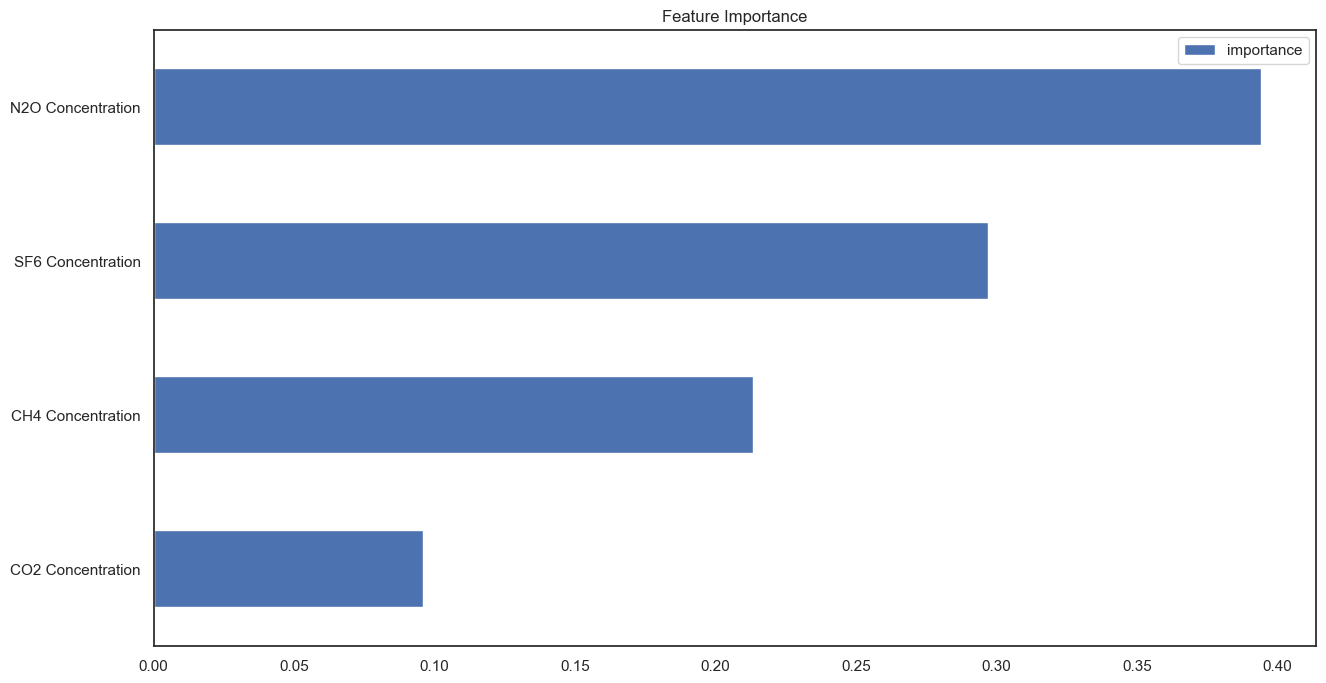

Best score: 0.8035506077332958
Best parameters: {'alpha': 0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 500}


In [46]:
# Run the function and store the train and test data
hil_train, hil_test, feat_importance_df = XGBoost_model(hil_roll, 'Average Monthly Temperature')

In [47]:
feat_importance_df

,importance
CO2 Concentration,0.095783
CH4 Concentration,0.213217
N2O Concentration,0.394022
SF6 Concentration,0.296978


| Site | CO2 | CH4 | N2O | SF6 | Score | Train MSE | Test MSE |
| ----- | -----|----|----|----|------|-------|-------|
| Boulder CO | 0.184992 | 0.134542 | 0.331006 | 0.34946 | 0.4964 | 0.00134 | 0.07762 |
| Hilo International HI | 0.095783 | 0.213217 | 0.394022 | 0.296978 | 0.8036 | 0.00157 | 0.00747 |
| Hohenpeissenberg GM | 0.289076 | 0.130822 | 0.324333 | 0.255768 | 0.745 | 0.00171 | 0.02719 |
| Cape Florida FL | 0.080755 | 0.252002 | 0.54538 | 0.119705 | 0.7629 | 0.00283 |	0.01764 | 
| Los Angeles CA | 0.120083 | 0.387547 | 0.406155 | 0.086215 | 0.3395 | 0.00255 | 0.02744 |
| San Francisco CA | 0.241779 | 0.186257 | 0.25387 | 0.318094 | 0.7346 | 0.00147 | 0.01333 |
| Vestmannaeyjar IC | 0.173443 | 0.182288 | 0.32528 | 0.318988 | 0.7497 | 0.00133 | 0.0173 |
| Temple TX | 0.023153 | 0.206188 | 0.247648 | 0.523011 | 0.7647 | 0.00133 | 0.02567 |

The `validation_0` (validation with training set) and `validation_1` (validation with test set) is how we check for overfitting/underfitting. We found that all model for all sites had slight overfitting. Similar to what we did with the linear model, we can graph the model against the actual data.

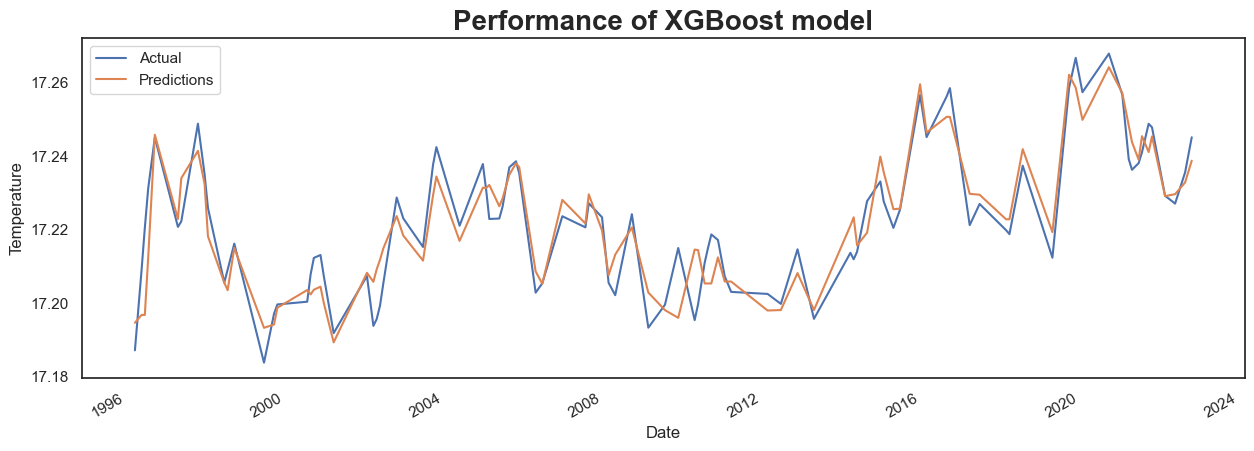

In [48]:
fig, ax = plt.subplots(figsize=(15, 5))
hil_test['Average Monthly Temperature'].plot(ax=ax, label='Actual')
hil_test['predictions'].plot(ax=ax, label='Predictions')

plt.title('Performance of XGBoost model', fontsize=20, fontweight='bold')
ax.set_ylabel('Temperature')
plt.legend()
plt.show();

The XGBoost model function is repeated for the other dataframes to obtain the metrics and best parameters. The list of best parameters for the model according to the site and its scores are listed:

| Site | Alpha | Learning Rate | Max Depth | No. estimators |
|-----|------|---------|------------|-----------|
| Boulder CO | 0 | 0.1 | 5 | 500 |
| Hilo International HI | 0 | 0.05 | 6 | 500 |
| Hohenpeissenberg GM | 0 | 0.05 | 5 | 500 |
| Cape Florida FL | 0 | 0.05 | 5 | 500 |
| Los Angeles CA | 0 | 0.05 | 6 | 500 |
| San Francisco CA | 0 | 0.05 | 5 | 500 |
| Vestmannaeyjar IC | 0 | 0.1 | 5 | 500 |
| Temple TX | 0 | 0.05 | 6 | 500 |

__XGBoost model of precipitation vs. carbon dioxide concentration__

We can repeat the same steps as before except with the precipitation data

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[0]	validation_0-rmse:13.82388	validation_1-rmse:13.97880
[100]	validation_0-rmse:0.63932	validation_1-rmse:1.11230
[200]	validation_0-rmse:0.34042	validation_1-rmse:1.04777
[300]	validation_0-rmse:0.21249	validation_1-rmse:1.02144
[371]	validation_0-rmse:0.15947	validation_1-rmse:1.02317


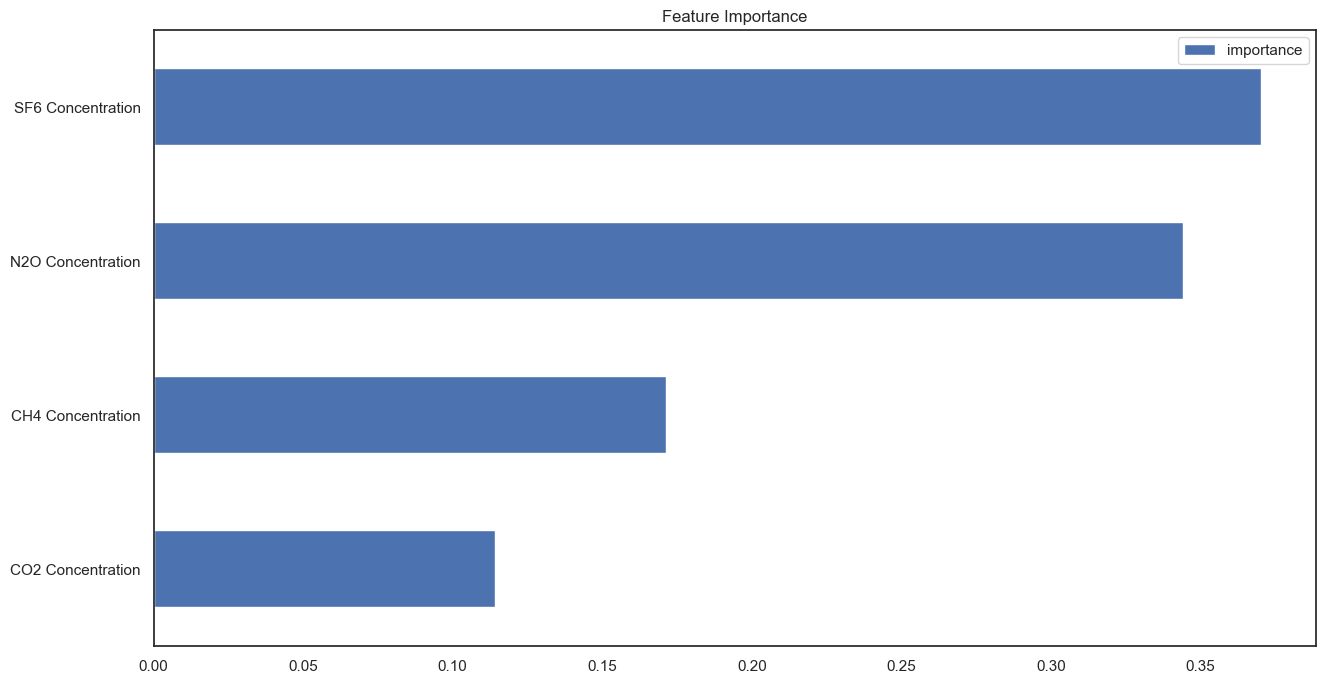

Best score: 0.4043311556018375
Best parameters: {'alpha': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000}


In [49]:
# Run the function with 'Total Monthly Precipitation' in for the variable
hil_train, hil_test, feat_importance_df = XGBoost_model(hil_roll, 'Total Monthly Precipitation')

In [50]:
feat_importance_df

,importance
CO2 Concentration,0.114258
CH4 Concentration,0.171283
N2O Concentration,0.344213
SF6 Concentration,0.370246


| Site | CO2 | CH4 | N2O | SF6 | Score | Train MSE | Test MSE |
|------|-----|-----|-----|-----|-------|-----------|----------|
| Boulder CO |	0.260857 | 0.16187 | 0.348527 | 0.228746 | 0.3372 | 0.09495 | 0.51313 |
| Hilo International HI | 0.114258 | 0.171283 | 0.344213 | 0.370246 | 0.4043 | 0.15947 | 1.02317 |
| Hohenpeissenberg GM |	0.28839 | 0.200248 | 0.239903 | 0.271458 | 0.4051 | 0.24361 | 0.54224 |
| Cape Florida FL |	0.15296 | 0.225028 | 0.224863 | 0.39715 | 0.4932 | 0.19152 | 0.85277 |
| Los Angeles CA |	0.185936 | 0.224596 | 0.550539 | 0.038929 | 0.1427 | 0.60062 | 0.85369 |
| San Francisco CA | 0.079269 | 0.191418 | 0.208395 | 0.520918 | 0.5691 | 0.24871 | 0.85898 |
| Vestmannaeyjar IC | 0.132302 | 0.143951 | 0.255541 | 0.468206 | 0.5896 | 0.00703 | 0.489 |
| Temple TX | 0.009212 | 0.025713 | 0.051922 | 0.913152 | 0.6504 | 0.00203 | 0.60057 |

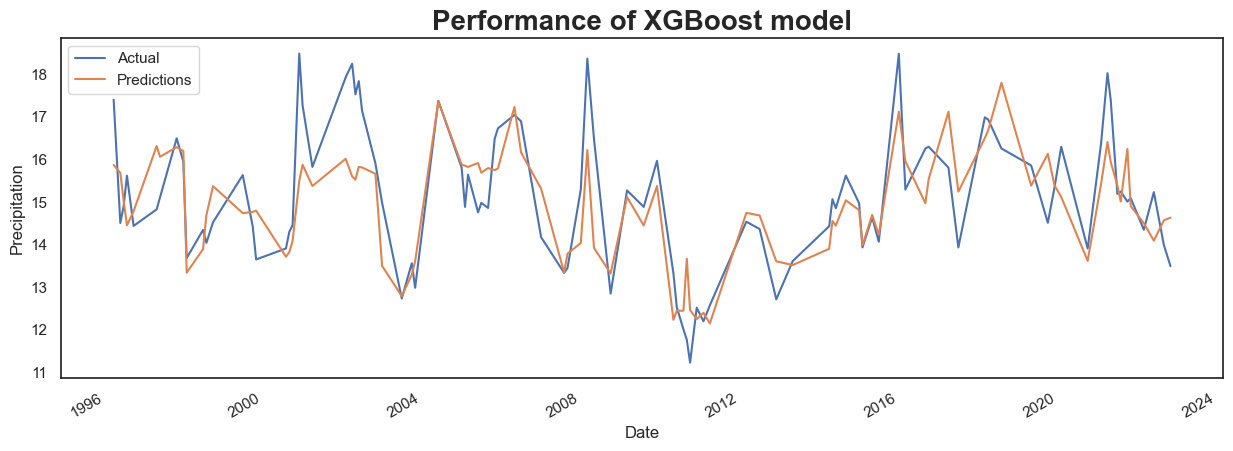

In [51]:
fig, ax = plt.subplots(figsize=(15, 5))
hil_test['Total Monthly Precipitation'].plot(ax=ax, label='Actual')
hil_test['predictions'].plot(ax=ax, label='Predictions')

plt.title('Performance of XGBoost model', fontsize=20, fontweight='bold')
ax.set_ylabel('Precipitation')
plt.legend()
plt.show();

Lists of mean squared error and parameters for the models:

| Site	| Alpha	| Learning Rate	| Max Depth	| No. estimators|
|----|-----|-------|------|-------|
| Boulder CO	| 0	| 0.01	| 5	| 1000|
| Hilo International HI	| 0	| 0.05	| 5	| 1000|
| Hohenpeissenberg GM |1 | 0.05	| 5	| 500|
| Cape Florida FL	| 0	| 0.1	| 5	| 500|
| Los Angeles CA	| 2	| 0.01	| 5	| 1000|
| San Francisco CA	| 1	| 0.1	| 7	| 500|
| Vestmannaeyjar IC	| 0	| 0.1	| 5	| 500|
| Temple TX	| 0	| 0.1	| 5	| 500|

# Conclusion
___
Overall the XGBoost had relatively higher metrics (r-squared and mean squared error) than the linear model. We recommend that the EPA use the XGBoost algorithm as it yielded lower MSE and higher r-squared values. With the model, the EPA can focus on limiting carbon emissions in these areas:
- Hilo International Airport
- Cape Florida
- Vestmannaeyjar
- Boulder, Colorado (for maintaining normal levels of precipitation)
<br>This will allow the EPA to use their budget wisely and not focus on carbon emissions in an area not affected by climate change.

<br>__Limitations__
- Due to the limitations of the operating system, the parameters for GridSearchCV is limited. A more powerful system may be able to more parameters to yield better metrics and reduce overfitting/underfitting.
- Some site have plenty of missing data that could not be replaced by the median as it may significantly alter the standard deviation.

<br>__Next Steps__
- Perform another experiment to observe how other greenhouse gases affect the climate. XGBoost has a unique property that always the algoritm to take in multiple features and decides which feature is more important in developing the predictive model.
- Consider other characteristics of the environment (cloud coverage, relative humidity).
- Compare how different biomes (marine, forests, etc.) respond to carbon emissions
- Improve upon the XGBoost model by adding more parameters to the GridSearchCV.